# 1. Sobre este projeto
> **Pessoa autora:** Ricarth Ruan da Silva Lima

> **GitHub**: https://github.com/ricarthlima/ia-tch001

O resultado esperado desse projeto é a escolha de um modelo para **classificação binária** para prever diabetes baseado em uma base de dados de indivíduos da tribo indígena Pima, com base em diversas características relacionadas à saúde.

A base de dados está disponível no [Kaggle](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) e já foi bastante estudada e testada, dando por exemplo que nos últimos 30 dias (com base em agosto de 2025) foram mais de meio milhões de downloads da base de dados, com mais de 3500 códigos públicos e 54 tópicos de discussão.

Por esta característica, o principal objetivo deste projeto é **didático**. Não existe a pretensão de desenvolver o **melhor modelo preditivo**.

Quando falamos de didática, falamos tanto para a minha prática e aprendizagem pessoal, como para minha avaliação como parte da pós-graduação em IA na FIAP, como também para que qualquer pessoa que venha a ler este documento consiga aprender e refletir a respeito dos processos básicos de tratamento e exploração de dados; pré-processamento, treino e avaliação do modelo.

Também por essa razão, este *notebook* será construído e disponibilizado em português, afinal, materiais em inglês já existem em abundância. **Entretanto, as variáveis e funções serão mantidas em inglês por uma decisão de que, como o Python foi escrito em inglês, ter duas línguas no código pode piorar a legibilidade.**

# 2. Sobre a base de dados
> **Base de dados:** https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data

A base de dados Pima Indians Diabetes é um dos conjuntos de dados mais utilizados em estudos e ensino de machine learning aplicados à saúde, especialmente para problemas de classificação binária. Ela foi criada a partir de um estudo conduzido pelo National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK) nos Estados Unidos, com o objetivo de prever a ocorrência de diabetes tipo 2 em mulheres da etnia Pima, que vivem na região do Arizona. Esse grupo foi escolhido porque apresenta uma das maiores taxas de incidência de diabetes do mundo, tornando-se relevante para pesquisas médicas e epidemiológicas. A base contém variáveis clínicas e fisiológicas, como número de gestações, índice de massa corporal, níveis de glicose, pressão arterial e histórico de hereditariedade, permitindo que modelos preditivos sejam testados e comparados. Por sua simplicidade, acessibilidade e equilíbrio entre dados reais e tratáveis, ela é amplamente usada como benchmark em cursos, competições e publicações científicas, sendo referenciada em repositórios como o UCI Machine Learning Repository (Dua & Graff, 2019) e no próprio Kaggle .

## 2.1 Entradas ou "Features"
Em IA e ML, chamamos de uma "feature" (que pode ser traduzida como característica, atributo ou variável de entrada) a informação mensurável ou observável usada como entrada para um modelo.

Cada feature representa uma propriedade relevante do fenômeno que está sendo analisado — por exemplo, no caso da base Pima Indians Diabetes, “nível de glicose” e “índice de massa corporal” são features. A qualidade e a relevância dessas características influenciam diretamente a capacidade do modelo de identificar padrões e fazer previsões precisas.

Aqui as entradas de dados captadas segundo a própria fonte:

- **Pregnancies**: número de gravidezes ao longo da vida;
- **Glucose**: Concentração de glucose no plasma;
- **BloodPressure (mm Hg)**: Pressão arterial diastólica;
- **SkinThickness  (mm)**: Espessura da prega cutânea do tríceps;
- **Insulin - 2-Hour serum insulin (mu U/ml)**: quantidade de insulina no sangue duas horas após uma ingestão de glicose;
- **BMI**: Índice de Massa Corporal (IMC);
- **DiabetesPedigreeFunction**: medida estatística que estima a influência genética do histórico familiar de diabetes;
- **Age**: Idade;

## 2.2 Saída
Há uma coluna `Outcome` na base de dados, ela tem valores binários variando entre 0 e 1, onde 0 indica a ausência de diabetes, e 1 indica a presença de diabete.

Será esse resultado que tentaremos criar um modelo para prever.

# 3. Importações iniciais
Aqui faremos as importações que serão úteis para todo a *pipeline*. Importações são importante pois existem **diversas** bibliotecas com código amplamente testado que resolvem diversos problemas. É uma excelente prática não reinventar a roda.

Vale dizer que o termo *pipeline* é extremamente usado nessa área e pode ser traduzido como "fluxo de processamento" ou, de forma mais didática, como "linha de montagem de etapas". Para efeitos de evitar estrangeirismos e jargões chamarei daqui em diante de "fluxo" ou "fluxo de processamento".

Vale dizer também que, diferente de outros tipos de códigos, é comum em *notebooks* como esse, importarmos bilbiotecas e classes quando formos usá-las, por isso você verá outras importações ao longo do código, em contraponto a simplesmente importar tudo no começo.

In [1]:
# A biblioteca pandas é usada para carregar, organizar e analisar dados em formato de tabela (linhas e colunas).
import pandas as pd
# O pacote kagglehub permite baixar dados ou modelos diretamente do Kaggle para o notebook, sem precisar acessar o site.
import kagglehub
# Importamos a classe KaggleDatasetAdapter para baixar e acessar datasets públicos do Kaggle diretamente pelo código.
from kagglehub import KaggleDatasetAdapter
# Importa a biblioteca NumPy e a apelida como "np", facilitando o uso de suas funções para cálculos numéricos e manipulação de arrays.
import numpy as np

# 3. Baixando o conjunto de dados
Existem diversas formas de ler o *dataset*, sendo a mais comum apenas baixá-lo e lê-lo usando usando o `pandas` com a função `read_csv`.

Porém, vamos fazer diferente, lendo direto do Kaggle usando sua biblioteca. Existem algumas vantagens em fazer isso, dentre elas:

- **Reprodutibilidade automática:** quem quiser testar este *notebook*, basta baixá-lo em um ambiente correto (com Python, Pandas e Kagglehub instalados), ou simplesmente abri-lo no Google Collab. Os dados serão baixados automaticamente sem precisar fazer download manual.
- **Evitar o uso do navegador:** você não precisa sair do ambiente de código para obter os dados, como com downloads ou montagem de drive.
- **Boa prática para projetos colaborativos:** ideal quando o notebook será executado em plataformas como Google Colab ou JupyterHub.
- **Menor risco de erro com caminhos de arquivo:** o arquivo vai sempre para uma pasta controlada (~/.kagglehub), evitando confusão com diferentes diretórios.

In [2]:
# Usamos o load_dataset para, vem comigo... ler o conjunto de dados
# "df" é uma convenção bem usada no pandas, vem de "dataframe", é a variável onde nossos dados estarão
# O primeiro parâmetro define que ele será adaptado para PANDAS
# O segundo leva o endereço do conjunto de dados, com o nome da pessoa autora e o nome do conjunto
# O terceiro é o arquivo do conjunto que usaremos, nesse caso, o único disponível
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/pima-indians-diabetes-database",
  "diabetes.csv",
)

/tmp/ipython-input-4023863673.py:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


# 4. Exploração dos dados
Agora vamos começar!

Este é um excelente primeiro passo antes de qualquer outra atividade: conhecer os nossos dados.

Precisamos entender com que dados estamos lidando antes de qualquer coisa. Sem essa etapa, erros serão deixados passar e isso influenciará lá no resultado final.

Então, vamos: **identificar problemas**, **entender padrões**, **pensar em algumas decisões futuras**.

## 4.1 Verificações simples

Para isso começaremos com simples comandos do próprio pandas, e depois avançaremos para visualizações.

In [3]:
# Antes de qualquer coisa: quantas linhas e quantas colunas temos? (linhas, colunas)
df.shape

(768, 9)

In [4]:
# Exibe as primeiras linhas do conjunto de dados para termos uma ideia de como ele está estruturado.
# Normalmente são as 5 primeira linhas, mas passando 10 por parâmetro, o `.head` mostra 10
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
# Mostra um resumo do conjunto de dados, incluindo o tipo de cada coluna e se há valores ausentes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Total de entradas:**
O conjunto de dados possui 768 amostras (linhas), ou seja, registros de 768 pacientes.

**Número de colunas:**
Existem 9 colunas (variáveis) no total, incluindo a variável-alvo (`Outcome`). Essa `Outcome` já é binária, mesmo que numérica ela varia entre 0 e 1, e pela lógica apresentada, será ela que tentaremos prever, o que já facilita bastante as coisas.

**Ausência de valores nulos:**
Todas as colunas têm exatamente 768 valores não nulos, o que indica que não há valores ausentes detectados diretamente pelo Pandas. Apesar disso, usando o `df.head()` já vimos alguns zeros que não parecem fazer sentidos e provavelmente teremos que tratar mais para frente.

**Tipos de dados:**
- A maioria das colunas são inteiros (int64), o que é comum em variáveis como número de gestações, idade, glicose, etc.
- Apenas duas colunas têm valores decimais (float64): BMI e DiabetesPedigreeFunction.

In [6]:
# O `.describe()` gera estatísticas como média, mínimo, máximo e quartis para ajudar a entender a distribuição dos dados em cada coluna numérica.
# Com o `round(2)`, arredondamos as estatísticas descritivas para 2 casas decimais para facilitar a leitura.
df.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


Um tanto de números pode não dizer nada para olhos não treinados no `.describe()`, mas muita informação útil pode ser tirada daqui. Dentre as que eu consegui notar:

### **Gravidezes (`Pregnancies`)**
- Número de gestações: varia de 0 a 17, com média 3.8     
- Valores razoáveis. Não há zeros suspeitos, mas adimito que 17 gestações é um número que para minha vivência é bem alto. Isso não necessariamente indica um *outlier*\* de primeira, dado que é clinicamente possível e pode variar com a cultura, mas por ser um valor mais que dobra do 75%, vale ficar com isso em mente.

### **Nível de glicose no sangue (`Glucose`)**
- Média 120.8, vai de 0 a 199
- Possui zeros, não faz sentido a pessoa ter zero de glicose no sangue, precisaremos tratar isso mais para frente.

### **Pressão arterial (`BloodPressure`)**
- Média 69.1, varia de 0 a 122
- Mais uma vez, zero é fisicamente impossível, provavelmente um valor ausente a ser tratado

### **Espessura da pele (`SkinThickness`)**
- Média 20.5, varia de 0 a 99
- Mais uma vez, zeros que indicam ausência de registro, pois é improvável clinicamente

### **Nível de Insulina (`Insulin`)**
- Média 79.8, vai de 0 a 846
- Seguimos com o problema dos zeros, e parece ter muitos, graças aos 25%.

### **IMC, Indice de Massa Corporal (`BMI`)**
- Média 31.9, de 0 a 67.1
- Zero não faz sentido fisiológico, precisa ser tratado

### **Probabilidade genética de diabetes (`DiabetesPedigreeFunction`)**
- Essa é a coluna mais complexa pois está relacionada com especificidades da pesquisa. Em uma pesquisa, noto que trata-se de uma medida estatística que estima a influência genética do histórico familiar de diabetes. Ela não representa um parente específico, mas sim uma combinação matemática do grau de parentesco com pessoas diabéticas e sua frequência na família.¹
- Nos limites do nosso conhecimento, nenhum valor nulo ou estranho aparente.

### **Idade (`Age`)**
- Média 33.2, varia de 21 a 81
- Valores perfeitamente normais, sem problemas evidentes ✨

### **Resultado (`Outcome`)**
- 0 = Não diabético, 1 = Diabético
- Nosso resultado binário que tentaremos prever
- Proporção: ~35% com diabetes

### **Conclusões**
Agora temos uma ótima visão do dados que estamos lidando e principalmente com a certeza que, apesar de não ter nenhum nulo, nenhum dado abertamente faltante, há vários zeros que indicam a ausência de informação

* *Outliers* são valores que fogem muito do padrão geral dos dados. Em português, podemos chamar de "valores discrepantes", valores extremos ou até pontos fora da curva. Eles podem ser causados por várias coisas como: erros de digitação, casos raros e muito excepcionais (com 17 gestações), erros de tratamento, erros de captura de dados, ou mesmo comportamentos interessantes de investigar.

## 4.2 Dados zerados
Já que notamos que dados zerados serão um problema, pois a pesquisa preencheu dados faltantes com zeros, vamos olhar isso mais a fundo para entender a dimensão da dor de cabeça que teremos mais para frente.

In [7]:
# Cria um DataFrame com contagem e porcentagem de zeros por coluna
# Usamos .drop(columns=["Outcome"]) para não pegar a última coluna, `Outcome` que tem zeros por ser binária
def zeros_per_column(dataframe):
    df_zeros = pd.DataFrame({
        'Quantidade de zeros': (dataframe.iloc[:, :8] == 0).sum(),
        'Porcentagem (%)': ((dataframe.iloc[:, :8] == 0).sum() / dataframe.shape[0] * 100).round(2)
    })
    df_zeros = df_zeros.sort_values(by='Porcentagem (%)', ascending=False)
    return df_zeros

zeros_per_column(df)

,Quantidade de zeros,Porcentagem (%)
Insulin,374,48.70
SkinThickness,227,29.56
Pregnancies,111,14.45
BloodPressure,35,4.56
BMI,11,1.43
Glucose,5,0.65
DiabetesPedigreeFunction,0,0.00
Age,0,0.00


Na tabela a seguir, podemos condensar algumas das nossas conclusões sobre os zeros:

| Coluna            | % de zeros | Interpretação                                                                                                                               |
| ----------------- | ---------- | ------------------ |
| **Insulin**       | **48,70%** | Quase **metade dos registros** estão zerados. Isso indica forte ausência de dados. |
| **SkinThickness** | **29,56%** | Também tem muitos dados faltando.|
| **Pregnancies**   | 14,45%     | Zero pode ser um valor **real**, pois devem representar pessoas que nunca engravidaram.                         |
| **BloodPressure** | 4,56%      | Clinicamente, pressão 0 não faz sentido.                                                                     |
| **BMI**           | 1,43%      | Pequena quantidade, mas zero em índice de massa corporal não é válido.                                                          |
| **Glucose**       | 0,65%      | Poucos zeros, mas glicose 0 é **impossível**.                                                                               |


## 4.3 Dados duplicados
E já que estamos procurando possíveis problemas, é sempre bom procurar por dados duplicados para poder deletá-los.

In [8]:
df.duplicated().sum()

np.int64(0)

Sem dados duplicados.

## 4.4 Visualização dos dados
Algumas conclusões foram tiradas apenas analisando os números com as funções do pandas, porém muitas vezes algumas novas percepções aparecem ao analisarmos visualmente os dados.

### 4.4.1 Matriz de dispersão  

Existem **diversas** formas de fazer isso, e uma muito interessante é usando uma matriz de dispersão. Trata-se de um gráfico que compara duas variáveis ao mesmo tempo, colocando uma variável no eixo X e outra no eixo Y.

Assim, podemos conseguir ver (literalmente) padrões, tendências, correlações e *outliers*.

In [9]:
# Importamos a função scatter_matrix para criar gráficos de dispersão entre as variáveis e observar possíveis relações entre elas.
from pandas.plotting import scatter_matrix
# Importamos o Matplotlib com o apelido plt, que será usado para exibir e personalizar gráficos no notebook.
import matplotlib.pyplot as plt
# Importamos a biblioteca Seaborn, que facilita a criação de gráficos estatísticos com visual mais limpo e informativo.
import seaborn as sns
# Importa o módulo math, que fornece funções matemáticas prontas como raízes, potências, trigonometria e constantes (por exemplo, pi).
import math


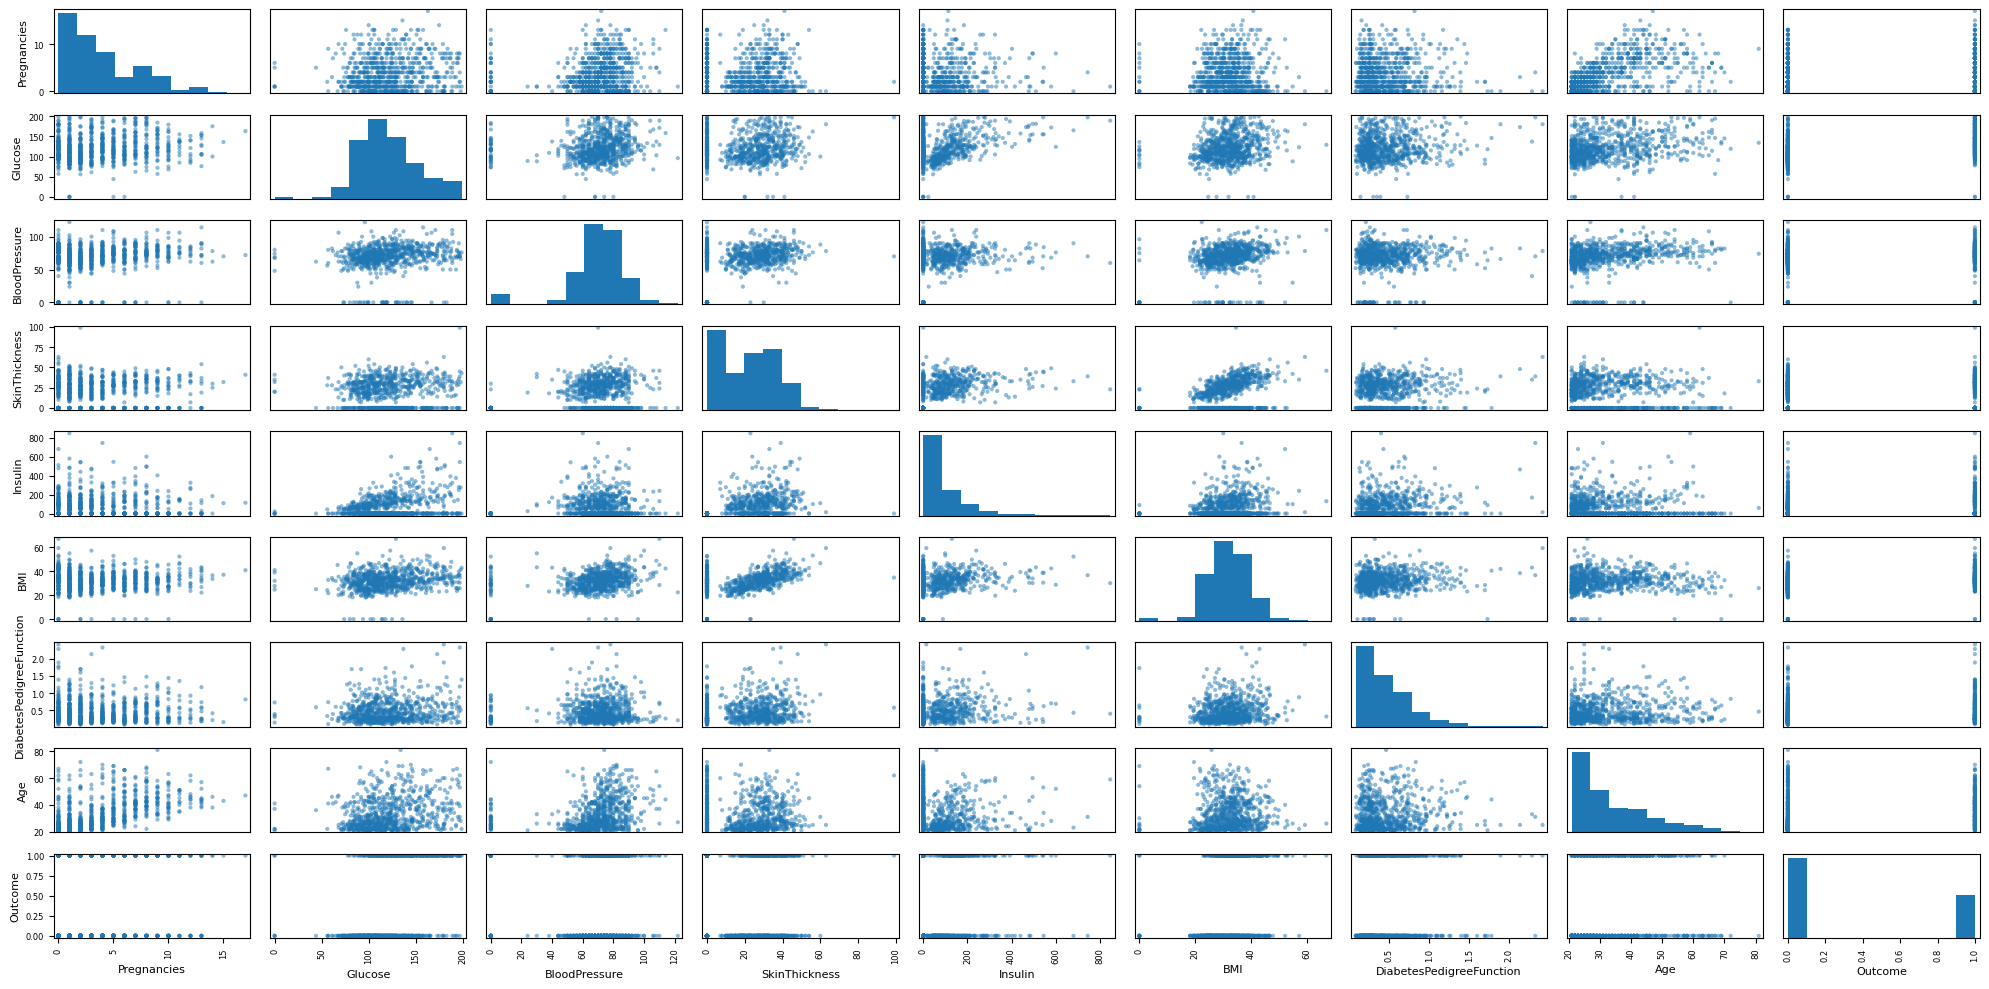

In [10]:
# Aqui criamos uma grade de gráficos que compara todas as variáveis entre si.
# Isso ajuda a enxergar relações entre os dados e descobrir variáveis que parecem influenciar o diagnóstico de diabetes.
scatter = scatter_matrix(df, figsize=(20, 10))

# Tratamentos na visualização do gráfico para facilita, mas opcional
for ax in scatter.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)
    ax.tick_params(axis='both', labelsize=6)
plt.tight_layout()
plt.show()

#### O que conseguimos observar?

1. Distribuições diagonais, mostram como cada variável está distribuída, pois estão sendo cruzadas com elas mesmas. Chamamos isso de "histogramas" e são importantes o suficiente para terem gráficos apenas para elas (para melhor visualização)
  - Variáveis como `BMI`, `Age` e `Glucose` têm distribuição mais parecida com uma curva normal.
  - Variáveis como `Insulin`, `SkinThickness` e `DiabetesPedigreeFunction` são mais assimétricas (com caudas longas), sugerindo a presença de valores discrepantes ou dados faltantes mascarados.

2. Analisando cruzamento com Outcome
  - É interessante notar a diferença do cruzamento das outras colunas com a `Outcome`.
  - Colunas onde o "desenho" do 0, e o "desenho" do 1 são parecidos, podem indicar uma baixa participação desse "atributo" no resultado final (`Outcome`).
  - Já colunas com "desenhos" significativamente diferentes entre 0 e 1 podem indicar uma participação maior;
  - Glucose, BMI, DPF e Age **PARECEM**, em um primeiro momento, bons indicativos. Observando o gráfico especificamente abaixo pode ficar mais claro:

<Axes: xlabel='Outcome', ylabel='Glucose'>

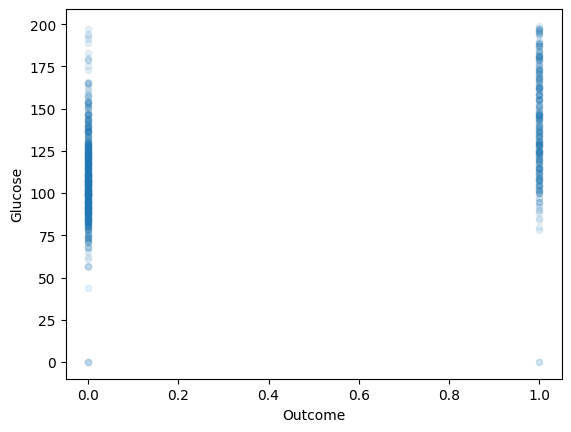

In [11]:
df.plot(kind = "scatter", x = "Outcome",  y = "Glucose", alpha = 0.1)

### 4.4.2 Histogramas
O cruzamento entre uma coluna com ela mesma geram histogramas muito interessantes. Esses são tão interessantes que nós podemos gerar alguns gráficos mais detalhados apenas para eles.

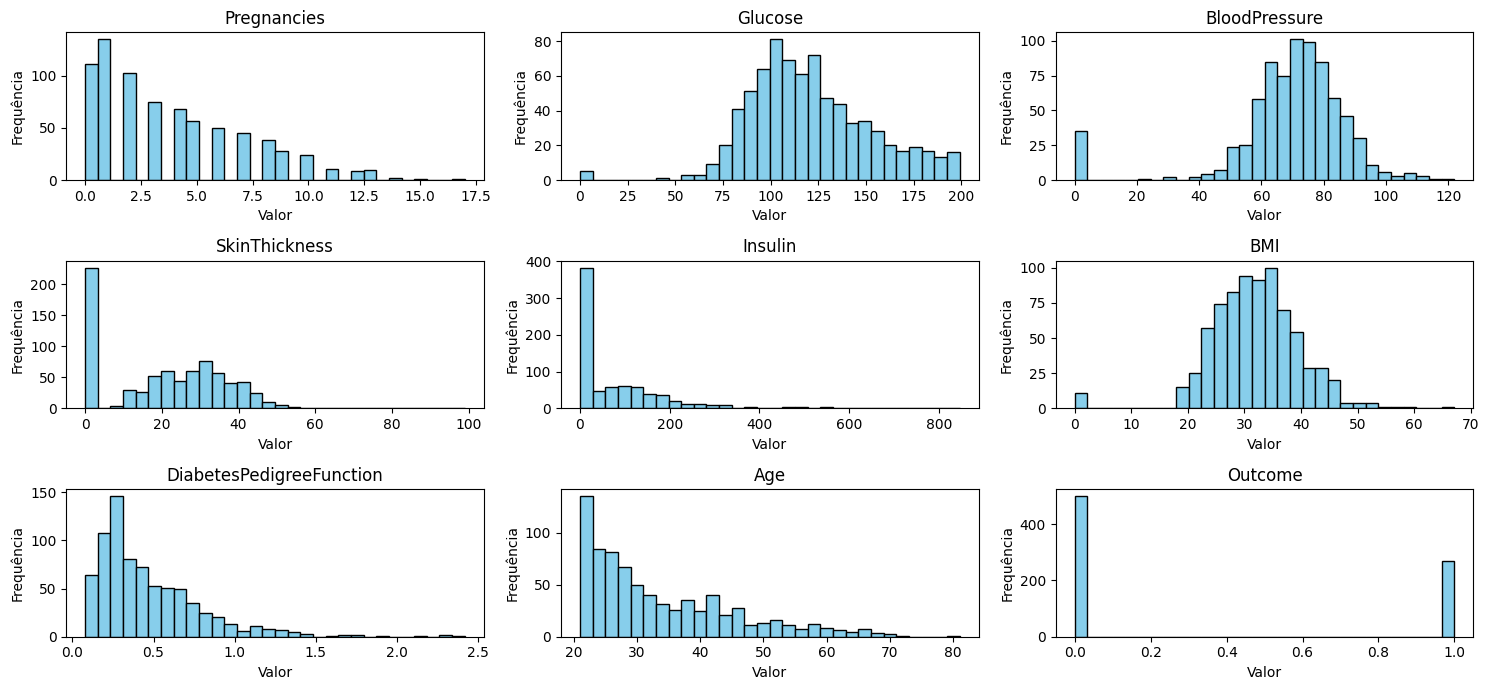

In [12]:
# Visualização com os histogramas de todas as variáveis, focando apenas nas distribuições individuais de cada coluna (sem comparação entre variáveis).
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 7))

for ax, col in zip(axes.flat, df.columns):
    ax.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(col)
    ax.set_ylabel("Frequência")
    ax.set_xlabel("Valor")

plt.tight_layout()
plt.show()

#### E agora, o que podemos observar?

1. Zeros suspeitos (prováveis dados ausentes ou inválidos)
- `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`: todos têm barras altas em 0, o que confirma todo o papo que já haviamos tido sobre materiais zerados.

2. Assimetria (distribuição não simétrica)
- `Pregnancies`, `Insulin`, `DiabetesPedigreeFunction`, `Age`: fortemente assimétricas à direita. Isso não precisa necessariamente ser um indicativo de *outliers*, basicamente pode estar relacionado com a natureza dos dados.
- `SkinThickness`, `BMI`: levemente assimétricas à direita, mas ainda com concentração razoável em valores centrais.
- `Glucose` e `BloodPressure`: distribuições mais próximas da normalidade, porém com alguma leve assimetria.
- `Outcome`: variável binária, sem simetria esperada, mostra claramente a proporção de casos positivos/negativos (mais negativos).

3. Possíveis outliers
- `Insulin`: cauda muito longa, valores chegando a quase 900, o que é muito acima da média esperada.
- `SkinThickness`: registros próximos de 100 mm parecem fora do padrão.
- `BMI`: valores próximos de 0 e acima de 60 são atípicos.
- `Age`: alguns registros acima de 70 anos, o que pode ser raro na amostra, mas não é biologicamente impossível.
- `Pregnancies`: casos acima de 12 gestações são raros e podem ser outliers.

### 4.4.3 Procurando por *outliers* com Boxplots
O boxplot é uma das formas mais usadas para identificar visualmente outliers, porque ele resume a distribuição dos dados e destaca valores que estão muito fora do padrão esperado.

O que ele mostra:

- **Retângulo verde (a tal da "caixa"):** representa o intervalo entre o 1º quartil (Q1, 25% dos dados) e o 3º quartil (Q3, 75% dos dados). Essa faixa é chamada de intervalo interquartil (IQR).
- **Linha dentro da caixa:** a mediana (Q2), ou seja, o valor central da distribuição.
- **"Bigodes":** se estendem até o último valor que não é considerado outlier.
- **Círculos (pontos fora dos bigodes)**: finalmente, são os *outliers*, valores que estão além desses limites.

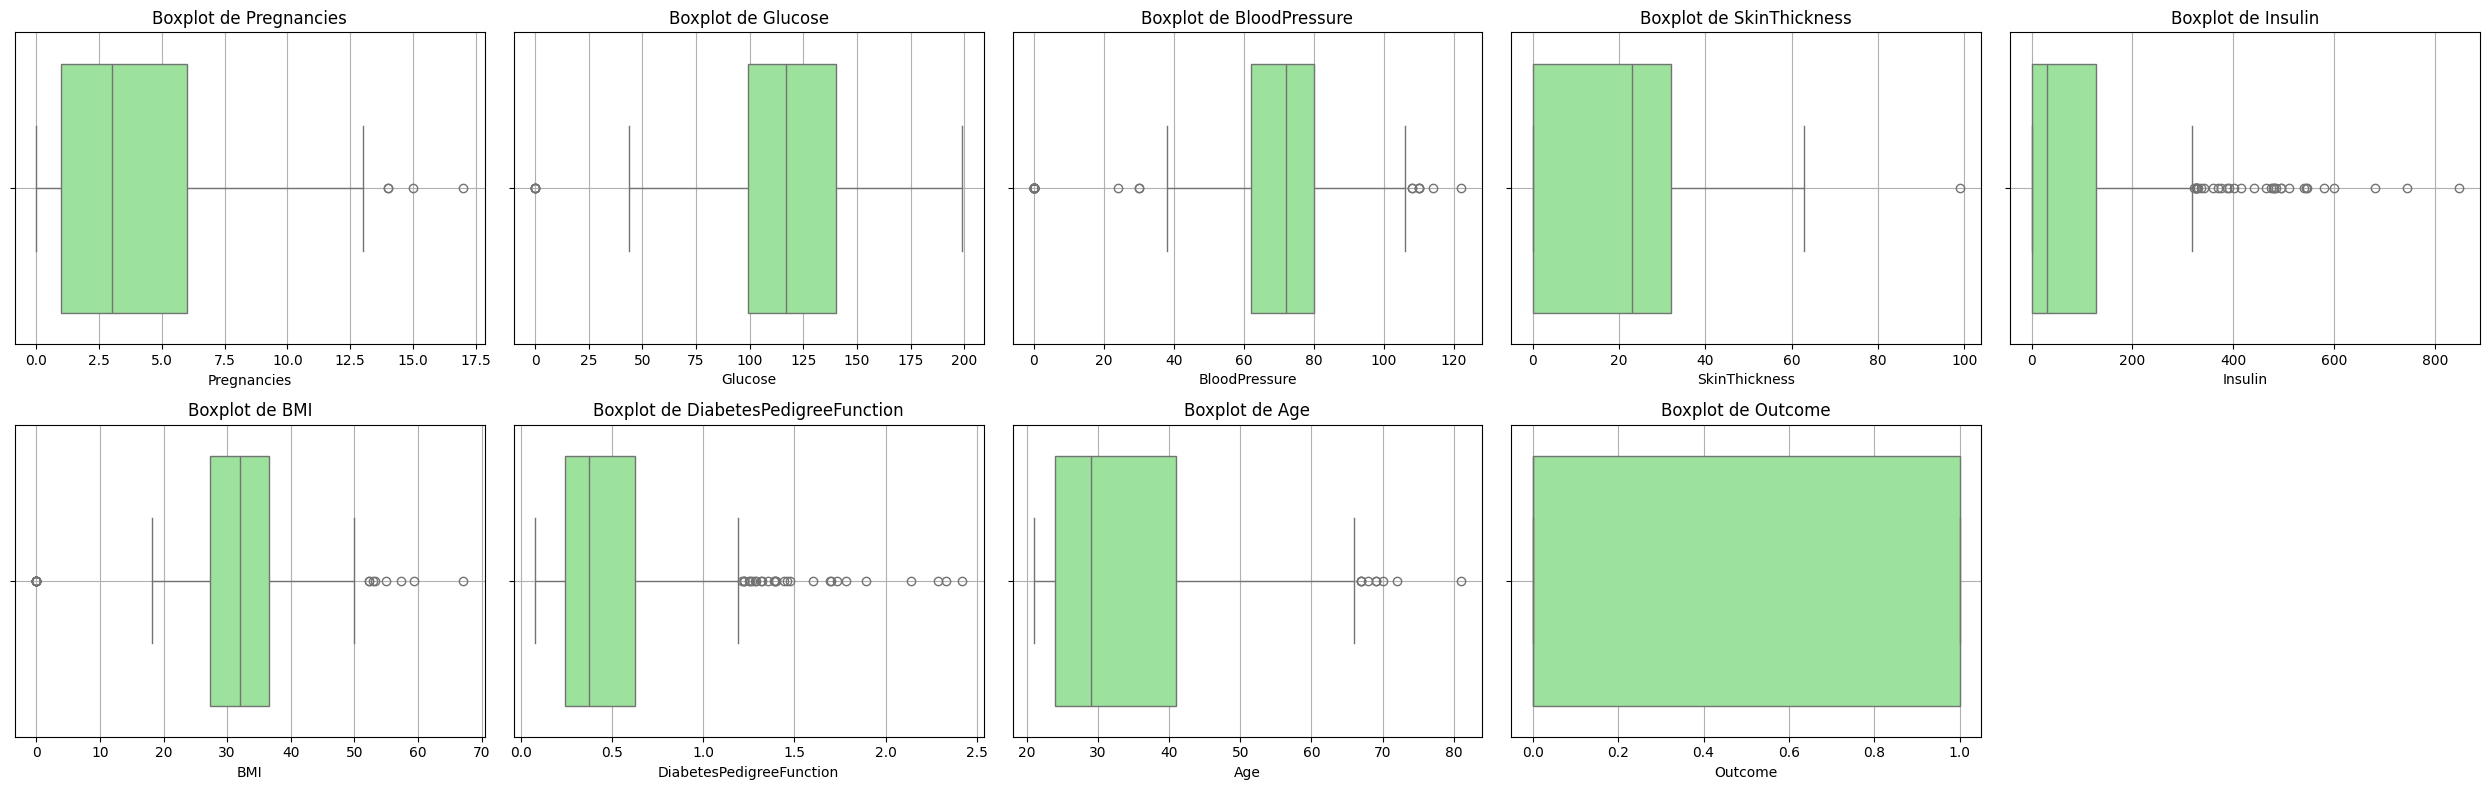

In [13]:
def boxplots(dataframe):
    num_cols = len(dataframe.columns)
    cols_per_row = 5  # quantos gráficos por linha
    rows = math.ceil(num_cols / cols_per_row)

    fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 5, rows * 4))
    axes = axes.flatten()  # deixa em lista para iterar

    for i, col in enumerate(dataframe.columns):
        sns.boxplot(x=dataframe[col], color='lightgreen', ax=axes[i])
        axes[i].set_title(f"Boxplot de {col}")
        axes[i].grid(True)

    # remove eixos vazios (se tiver)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

boxplots(df)

#### O que concluímos?

- `Insulin`: num primeiro momento tem muitos pontos fora dos bigodes para cima, indicando uma grande quantidade de valores atipicamente altos. Porém é importante lembrar o tanto de valores **zero** essa coluna possui, e eles estão certamente influenciando esse resultado.

- `SkinThickness`, `BMI`, `BloodPressure`, `Pregnancies`, `DiabetesPedigreeFunction`: apresentam outliers, mas em menor quantidade. As questões de zeros podem ter que ser levada em consideração também.

- `Age`: é dificil falar de outlier com idade, por causa da natureza do atributo. Não vi anormalidades.

É válido usar nossa função `boxplots` novamente após tratar os zeros.


### 4.5 Correlações
Uma forma bem interessante de analisar o cruzamento entre os atributos é também usar correlações.

É uma medida que mostra o quanto duas variáveis estão relacionadas entre si.
O resultado varia de -1 a 1:
- +1: correlação perfeita e positiva (uma sobe, a outra também sobe)
- 0: nenhuma correlação (são independentes)
- -1: correlação perfeita e negativa (uma sobe, a outra desce)

Em comparação, a scatter_matrix() ilustra visualmente o que a correlação numérica tenta quantificar com df.corr().

Se duas variáveis têm alta correlação positiva, você verá uma nuvem de pontos formando uma linha ascendente no gráfico.

Se a correlação for baixa ou próxima de 0, o gráfico vai mostrar um nuvem desorganizada.

In [14]:
# Calculamos a correlação entre todas as variáveis numéricas para entender como elas se relacionam entre si e com o diagnóstico (Outcome).
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# 5. Tratamento dos dados
Depois de analisar bem nossos dados, chegou a hora de tratá-los!

Antes de absolutamente qualquer coisa vamos copiar nosso dataframe `df` para um outro, o `df_treated`, e esse novo é quem sofrerá o tratamento.

Isso é útil para podermos fazer comparações mais para frente.

In [15]:
# Vamos separar os dataframes para, mais pra frente, podermos compará-los e ver a efetividade do nosso tratamento
df_treated = df.copy()


## 5.1 Tratando valores zerados
Vamos dar uma olhada novamente na nossa `zero_per_column`:

In [16]:
# Conjunto de dados que tínhamos criado anteriormente para visualizar a quantidade e proporção de zeros por colunas
zeros_per_column(df)

,Quantidade de zeros,Porcentagem (%)
Insulin,374,48.70
SkinThickness,227,29.56
Pregnancies,111,14.45
BloodPressure,35,4.56
BMI,11,1.43
Glucose,5,0.65
DiabetesPedigreeFunction,0,0.00
Age,0,0.00


#### Como lidar com eles? Temos **várias** opções dentre elas:

1. Simplesmente remover as linhas contendo zero;
2. Substituir os valores de zero pela média, moda ou mediana a depender da lógica da coluna;
  - **Média**: bom para distribuições simétricas;
  - **Moda**: útil para variáveis categóricas;
  - **Mediana**: melhor para dados com dados discrepantes (*outliers*) ou assimétricos;
3. Imputar valores usando técnicas como:
  - Lógica do mundo real (abstrato e perigoso, pode servir em situações específicas);
  - Interpolação, onde você pode preenchemos valores ausentes com base em pontos antes e depois. Faz muito mais sentido para dados temporais;
  - Utilizar modelos prontos de imputação como Regressão Linear, KNN, Redes Neurais, etc;

#### **E como escolher?**
1. Remover linhas geralmente é a pior opção exceto se os dados não validos representarem um número ínfimo de linhas, não é o nosso caso. Como vimos em `zero_per_column`, quase METADE das nossas linhas seriam removidas por causa da falta de dados em `Insulin`.
  - E não, isso não é uma má interpretação da nossa parte, eu pesquisei. Realmente os dados de insulina estão faltantes em várias das pessoas pesquisadas ² ³.
2. Substituição simples vai funcionar para os casos com baixa taixa de zeros. `BMI` com 1,43%, `Glucose` com 0,65% e `BloodPressure` com 4,56% vão servir bem. Para todas elas utilizaremos a mediana, pois essas colunas possuem assimetria e valores discrepantes, como vimos nos histogramas.
3. O imputamento de valores vai funcionar para as colunas com quantidades altas de zeros:
  - `Insulin` (48% de zeros): utilizaremos Regressão Linear por ser uma variável clinica sabidamente relacionada com a `Glucose` e a `Age`;
  - `SkinThickness` (30% de zeros): utilizaremos o KNNImputer pois vimos uma relação forte com `BMI` e `Age`;


### 5.1.1 Resolvendo casos simples

In [17]:
# BMI -> Mediana
# Substituímos os valores zero da coluna Glucose pela sua mediana, pois zeros representam dados ausentes e não valores reais.
df_treated.loc[df_treated["BMI"] == 0, "BMI"] = df_treated["BMI"].median()
(df_treated["BMI"] == 0).sum()

np.int64(0)

In [18]:
# Glucose -> Mediana
df_treated.loc[df_treated["Glucose"] == 0, "Glucose"] = df_treated["Glucose"].median()
(df_treated["Glucose"] == 0).sum()

np.int64(0)

In [19]:
# BloodPressure -> Mediana
df_treated.loc[df_treated["BloodPressure"] == 0, "BloodPressure"] = df_treated["BloodPressure"].median()
(df_treated["BloodPressure"] == 0).sum()

np.int64(0)

### 5.1.2 Usando KNN para imputar `SkinThickness`

O KNN (K-Nearest Neighbors) para imputação funciona encontrando as observações mais parecidas com a que tem o valor faltante, usando as demais variáveis como referência.

No contexto biométrico, SkinThickness tem correlação com variáveis como `BMI`, `Age`, `Glucose` e até `Insulin`, mas não usaremos `Insulin` pois ela também precisa ser tratada. Pessoas com características corporais semelhantes tendem a ter valores próximos de dobra cutânea.

Isso é melhor do que simplesmente substituir pela média ou mediana, que ignoram essas relações.

In [20]:
from sklearn.impute import KNNImputer

# Substitui os zeros por NaN apenas na SkinThickness
skin_na = df_treated[['SkinThickness', 'BMI', 'Age', 'Glucose']].copy()
skin_na['SkinThickness'] = skin_na['SkinThickness'].replace(0, np.nan)

# Aplica o imputador
imputer = KNNImputer(n_neighbors=5)
skin_imputed = imputer.fit_transform(skin_na)

# Substitui SOMENTE a coluna SkinThickness original com os novos valores imputados
df_treated['SkinThickness'] = skin_imputed[:, 0]

In [21]:
(df_treated["SkinThickness"] == 0).sum()

np.int64(0)

In [22]:
df_treated.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,0,33.6,0.627,50,1
1,1,85,66,29.0,0,26.6,0.351,31,0
2,8,183,64,30.8,0,23.3,0.672,32,1
3,1,89,66,23.0,94,28.1,0.167,21,0
4,0,137,40,35.0,168,43.1,2.288,33,1


### 5.1.3 Usando Regressão Linear para preenchar o `Insulin`
A variável `Insulin` no Pima Indians Diabetes costuma ter alta correlação com `Glucose` e `BMI`, afinal quanto maior glicose e IMC, maior tende a ser a insulina circulante.

Isso significa que é possível estimar valores de Insulin com uma regressão$^4$ baseada nessas variáveis preditoras. Como a relação é relativamente monótona, ou seja, valores altos de glicose podem indicar valores altos de insulina, um modelo linear tende a funcionar bem.

**Vantagens sobre o KNN nesse caso:**

- **Mais rápido:** o modelo aprende uma única equação e aplica, sem precisar recalcular distâncias para cada linha.
- **Menos sensível à dimensionalidade:** o KNN pode perder precisão se você usar muitas variáveis, enquanto a regressão foca no ajuste global.

**Observação engraçada:**

É engraçado notar que no próximo bloco de código faremos um microexemplo contido de tudo que estamos fazendo em todo o notebook.

1. Primeiro definiremos quais outras colunas serão usadas para isso;
2. Depois, separaremos a entrada em X e a saída em Y como verememos mais pra frente;
3. Em seguida, usa o modelo para prever os dados e substituir no `df`;

In [23]:
# Insulin -> Regressão Linear
# Importamos o modelo de Regressão Linear para prever valores ausentes da variável Insulin com base em outras variáveis do conjunto de dados.
from sklearn.linear_model import LinearRegression

# Fazemos esse teste só para nosso notebook não precisar rodar tudo isso de novo caso o DF na memória já esteja tratado
if ((df_treated["Insulin"] == 0).sum() > 0):
  df_treated['Insulin'] = df_treated['Insulin'].astype(float)

  # 1. Define as entradas que serão usadas para prever a insulina
  features = ['Glucose', 'BMI', 'Age', 'BloodPressure']

  # 2. Separa os dados com valores válidos de Insulin (≠ 0)
  valid_data = df_treated[df_treated['Insulin'] != 0]

  # 3. Separa X e y para treinar o modelo
  X_train_ins = valid_data[features]
  y_train_ins = valid_data['Insulin']

  # 4. Treina o modelo de regressão
  model_insulin = LinearRegression()
  model_insulin.fit(X_train_ins, y_train_ins)

  # 5. Seleciona os dados com Insulin == 0 (ausentes)
  rows_without_data = df_treated[df_treated['Insulin'] == 0]
  X_pred_ins = rows_without_data[features]

  # 6. Usa o modelo para prever os valores ausentes
  predicted_values = model_insulin.predict(X_pred_ins)

  # 7. Substitui os zeros pelos valores preditos
  df_treated.loc[df_treated['Insulin'] == 0, 'Insulin'] = predicted_values

In [24]:
zeros_per_column(df_treated)

,Quantidade de zeros,Porcentagem (%)
Pregnancies,111,14.45
Glucose,0,0.00
BloodPressure,0,0.00
SkinThickness,0,0.00
Insulin,0,0.00
BMI,0,0.00
DiabetesPedigreeFunction,0,0.00
Age,0,0.00


### 5.1.3 Visualização pós resolução dos zeros
Agora, usaremos o mesmo código de visualização de histogramas que usamos no conjunto de dados original, no conjunto de dados tratados.

E o que estamos buscando observar? `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin` e `BMI` que possuiam zeros não condizentes, agora não deveram apresentar nenhum zeros, e ter uma distribuição mais simétrica.

Agora podemos sobrer os histogramas de antes e depois do tratamento para observarmos nossos avanços.

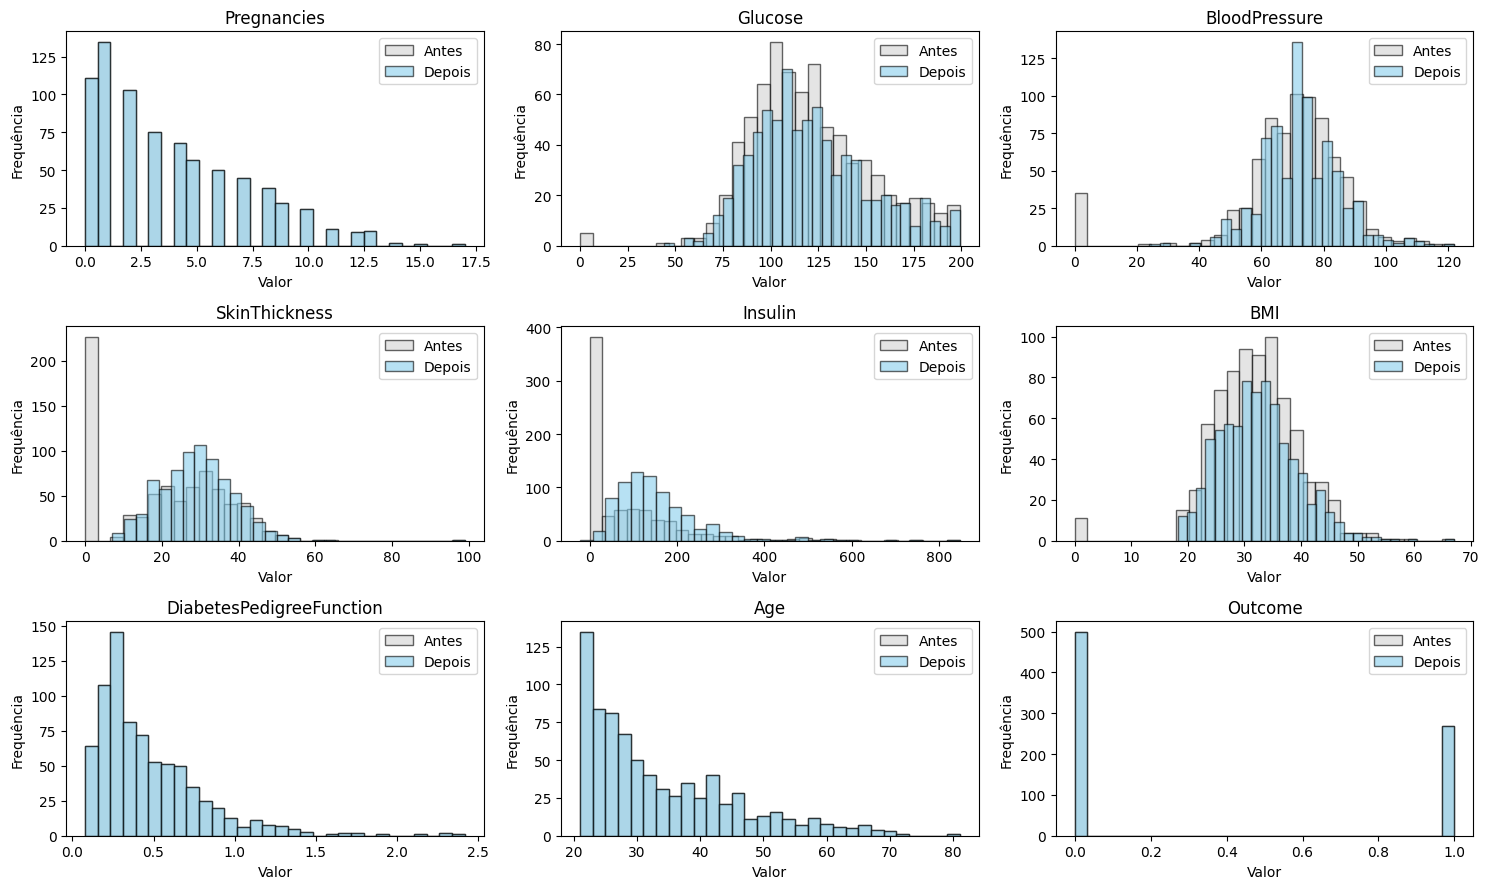

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 9))

for ax, col in zip(axes.flat, df_treated.columns):
    ax.hist(df[col], bins=30, color='lightgray', alpha=0.6, label='Antes', edgecolor='black')
    ax.hist(df_treated[col], bins=30, color='skyblue', alpha=0.6, label='Depois', edgecolor='black')
    ax.set_title(col)
    ax.set_ylabel("Frequência")
    ax.set_xlabel("Valor")
    ax.legend()

plt.tight_layout()
plt.show()

## 5.2 E os *outliers* como ficam?

In [26]:
# Antes de qualquer coisa, deixaremos esse o `df_treated_with_outliers` como backup e trataremos o `df_treated`
df_treated_with_outliers = df_treated.copy()

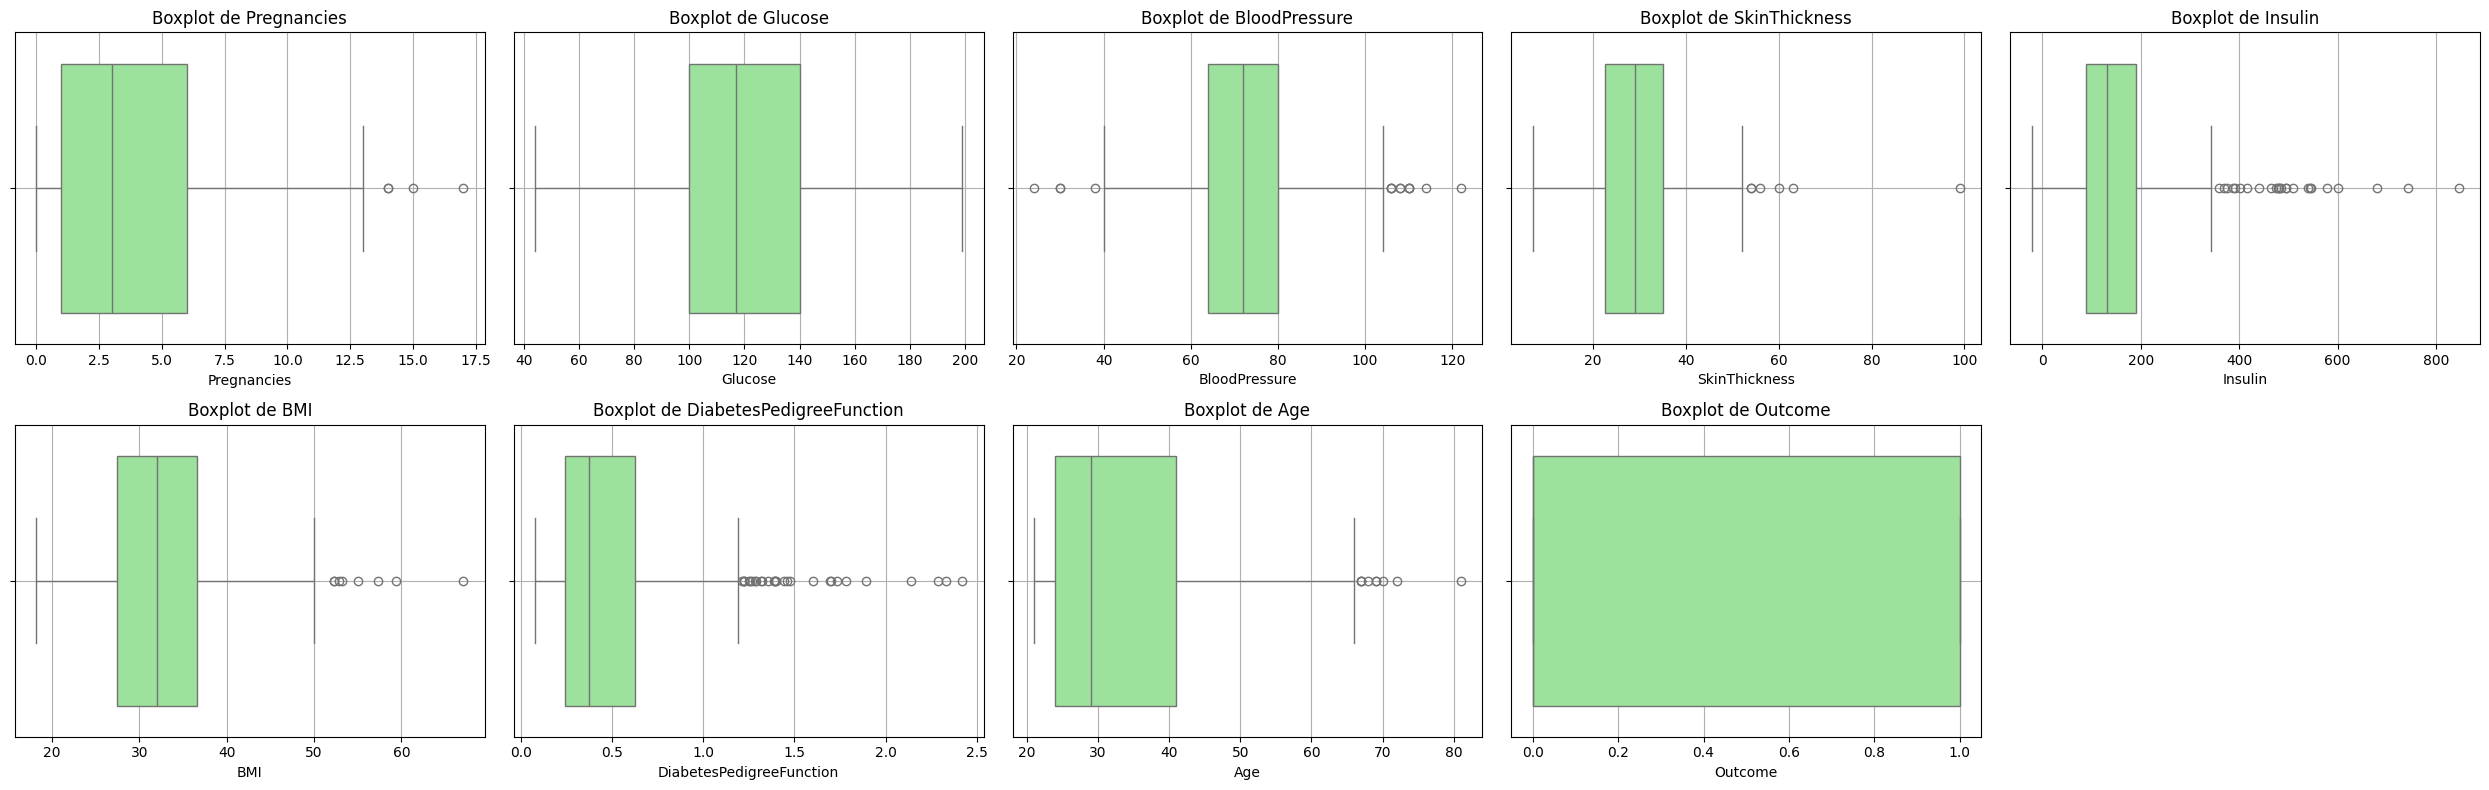

In [27]:
boxplots(df_treated)

Agora que os zeros foram tratados, os boxplots possivelmente mostram os valores discrepantes reais, ou seja, valores que estão muito distantes da faixa central dos dados.

**Mas será que devemos tratá-los?**

Antes de mais nada, não vamos considerar gravidezes, ok? É muito dificil de imaginar um erro de medição, são poucos "dados discrepantes", não parece ser uma entrada tão determinante para o `outcome` na nossa matriz de dispersão, e ainda tem uma aspecto cultural a ser respeitado.

1. **Contexto clínico**: em dados médicos, alguns valores extremos podem ser casos reais e importantes (por exemplo, insulina muito alta pode indicar resistência severa à insulina). Se o objetivo do modelo for diagnóstico, remover esses casos pode fazer o algoritmo perder informações valiosas.

2. **Sensibilidade do algoritmo**: modelos como Regressão Logística e Árvores de Decisão lidam relativamente bem com outliers. Porém modelos baseados em distância (KNN, SVM, Redes Neurais) podem ter desempenho prejudicado, pois *outliers* distorcem cálculos de distância e escalas.

3. **Quantidade e dispersão**: em `Insulin` e `DiabetesPedigreeFunction` a dispersão é muito grande, esses valores podem puxar a escala e atrapalhar a normalização/padronização. Já em `BloodPressure`,  `BMI` e `SkinThickness`, os valores discrepantes são menos extremos, mas ainda podem influenciar modelos sensíveis.

**E como vamos tratar?**

- Podemos simplesmenter manter tudo se forem clinicamente válidos (ou seja, não for sabido explicitamente que foi um erro de medição, e até então de fato não são) e o algoritmo escolhido tolerar bem *outliers*.
- Usar algoritmos de transformação para reduzir a influência sem remover dados.
- Capar, ou seja, limitar os valores máximos/mínimos a um percentil (ex.: 1º e 99º).
- Remover linha inteira, apenas se houver evidência de erro de medição.

Como testaremos vários modelos, pode ser interessante separar um dataframe com o tratamento de discrepantes e outro não.

#### Log x Box-Cox

Falaremos sobre duas principais transformações dos dados para lidar com valores discrepantes: a **transformação logarítmica** e a **transformação Box-Cox** são técnicas comuns para reduzir a assimetria de variáveis numéricas e minimizar o impacto de *outliers*.

- **Log:** Mais simples, basicamente aplica `log(x)` (ou `log(x+1)` quando há zeros, não é mais nosso caso), comprimindo valores altos e tornando a distribuição mais próxima da normal, mas assume que a relação de ajuste seja sempre a mesma.
- **Box-Cox:** á o Box-Cox é mais flexível: aplica uma transformação de potência controlada por um parâmetro 𝜆, escolhido para aproximar a distribuição de uma normal; quando λ=0, o Box-Cox se comporta exatamente como o log.

Assim, enquanto o log é direto e rápido, o Box-Cox adapta a intensidade da transformação a cada variável, podendo gerar distribuições mais equilibradas.

Usaremos o apoio visual para decidir entre os dois. O código a seguir faz as transformações localmente para estudarmos a diferença da simetria entre o original, o log e o box-cox.


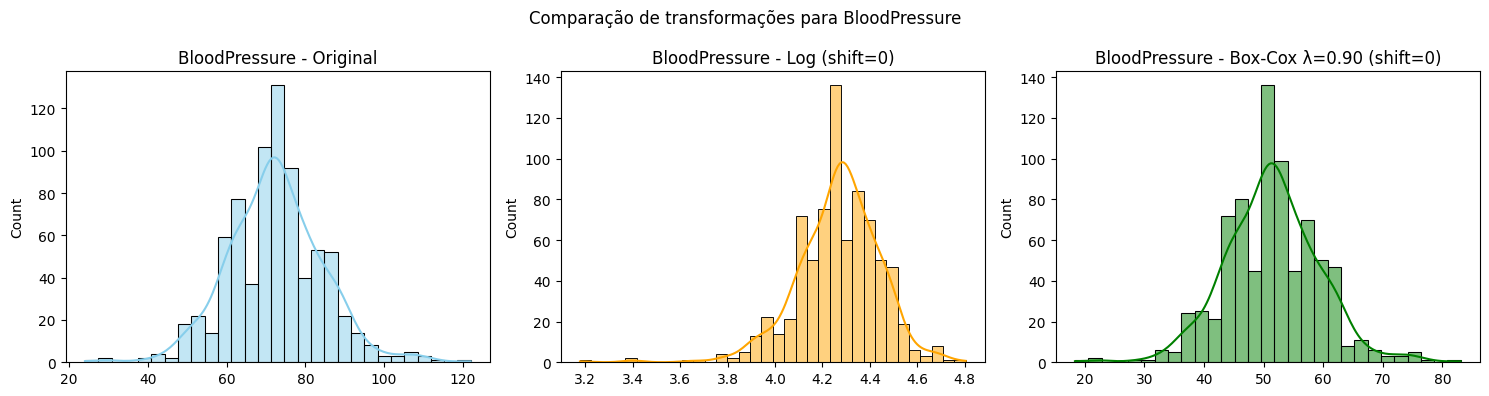

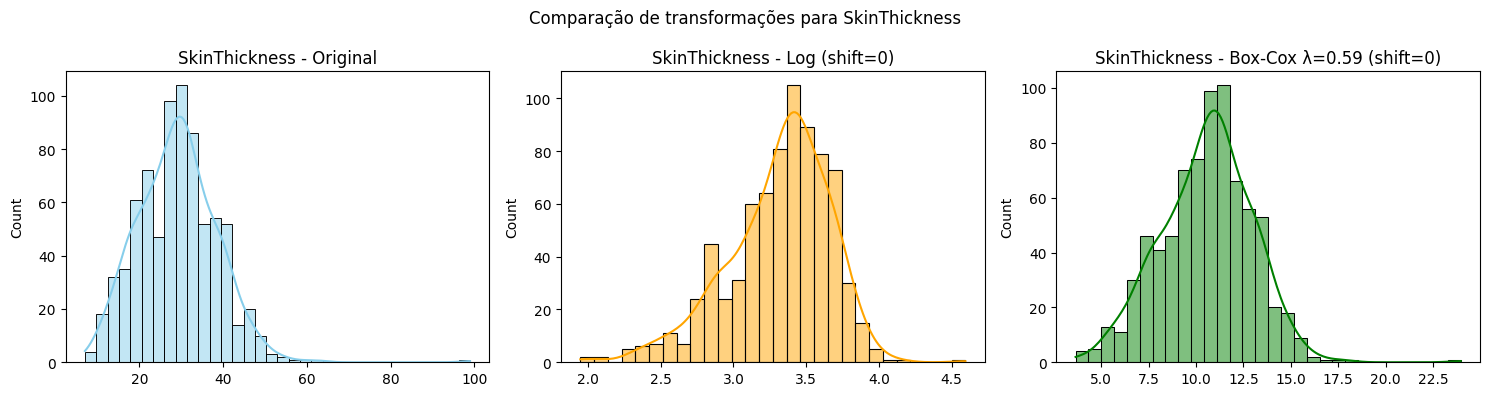

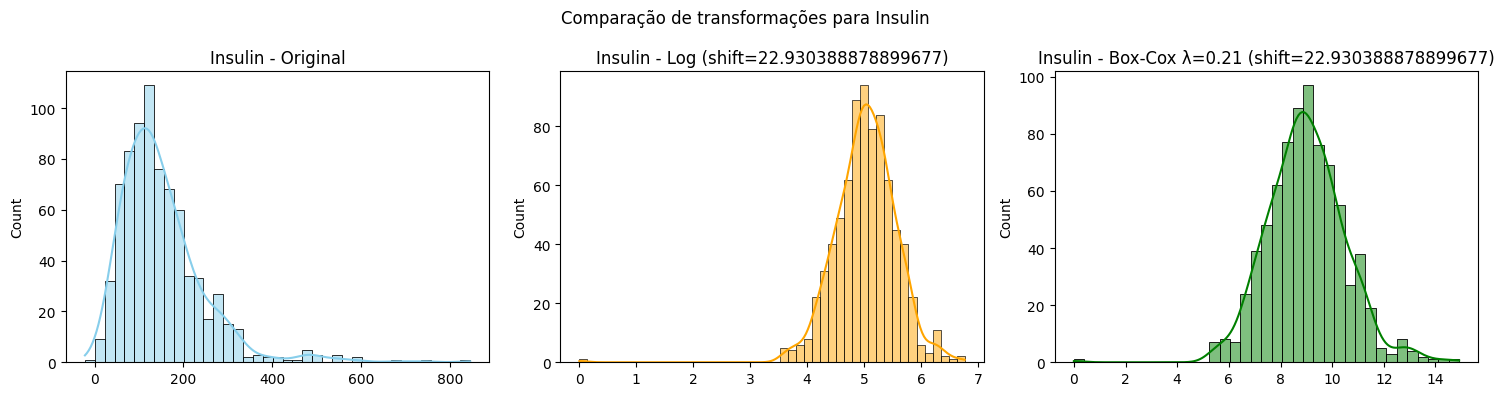

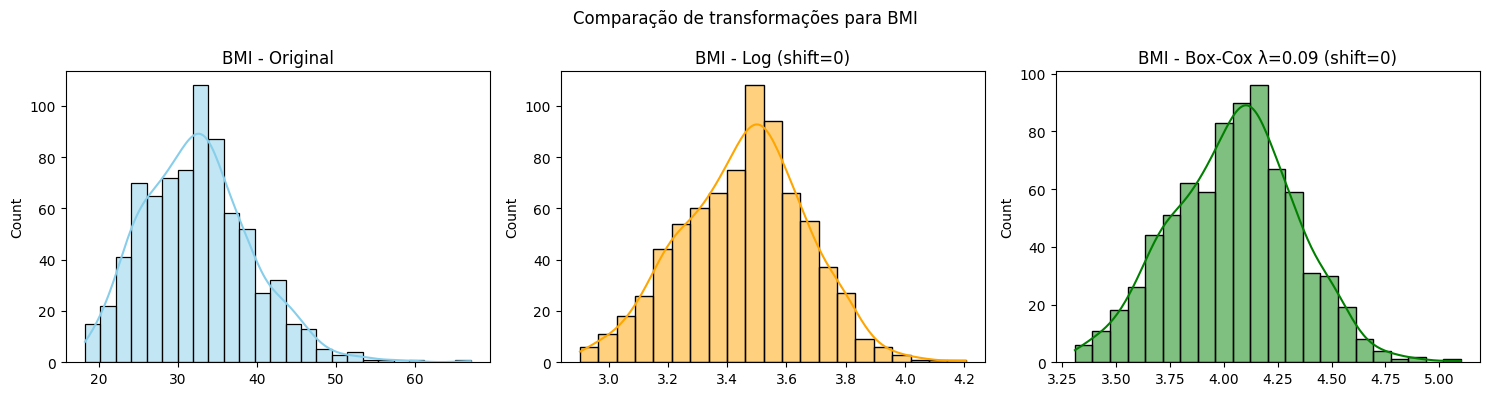

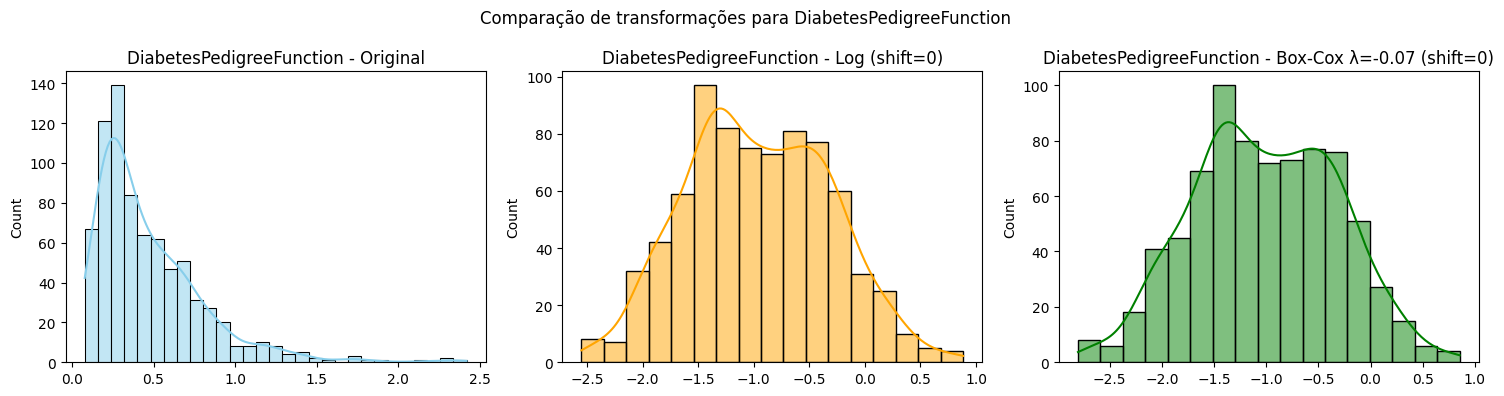

In [28]:
# Importa a função boxcox do módulo scipy.stats, usada para aplicar a transformação Box-Cox em dados, tornando distribuições mais próximas da normalidade.
from scipy.stats import boxcox

cols = ['BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction']

for col in cols:
    original = df_treated[col].values

    # Garantir que todos sejam > 0 para as transformações
    min_val = original.min()
    if min_val <= 0:
        shift = abs(min_val) + 1
        original_shifted = original + shift
    else:
        shift = 0
        original_shifted = original.copy()

    # Transformações
    log_transformed = np.log(original_shifted)
    boxcox_transformed, fitted_lambda = boxcox(original_shifted)

    # Plot
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    sns.histplot(original, ax=axes[0], kde=True, color="skyblue")
    axes[0].set_title(f"{col} - Original")

    sns.histplot(log_transformed, ax=axes[1], kde=True, color="orange")
    axes[1].set_title(f"{col} - Log (shift={shift})")

    sns.histplot(boxcox_transformed, ax=axes[2], kde=True, color="green")
    axes[2].set_title(f"{col} - Box-Cox λ={fitted_lambda:.2f} (shift={shift})")

    plt.suptitle(f"Comparação de transformações para {col}")
    plt.tight_layout()
    plt.show()


Agora vamos analisar coluna por coluna:

- **BloodPressure**: escolher Box-Cox (λ ≈ 0.90), porque mantém a forma próxima da original, mas corrige levemente a assimetria. O log aqui distorce demais a escala e não traz ganho real.

- **SkinThickness**: escolher Box-Cox (λ ≈ 0.59), pois reduziu a cauda direita sem achatar tanto a distribuição quanto o log. Ficou mais simétrica e próxima de normal.

- **Insulin**: escolher Box-Cox (λ ≈ 0.21), porque ajustou melhor que o log, centralizando a curva e reduzindo bastante a assimetria. Esse é um caso onde a diferença é bem visível.

- **BMI**: escolher Box-Cox (λ ≈ 0.09), já que ele suavizou de forma mais equilibrada que o log, deixando a distribuição mais simétrica sem comprimir demais.

- **DiabetesPedigreeFunction:** Aqui tanto faz entre log e Box-Cox, porque o λ ficou muito próximo de 0 (-0.07), o que significa que o Box-Cox praticamente aplicou um log. Nesse caso, escolheria Box-Cox apenas por consistência com as outras variáveis.

Ou seja, vamos usar box-cox para todos:

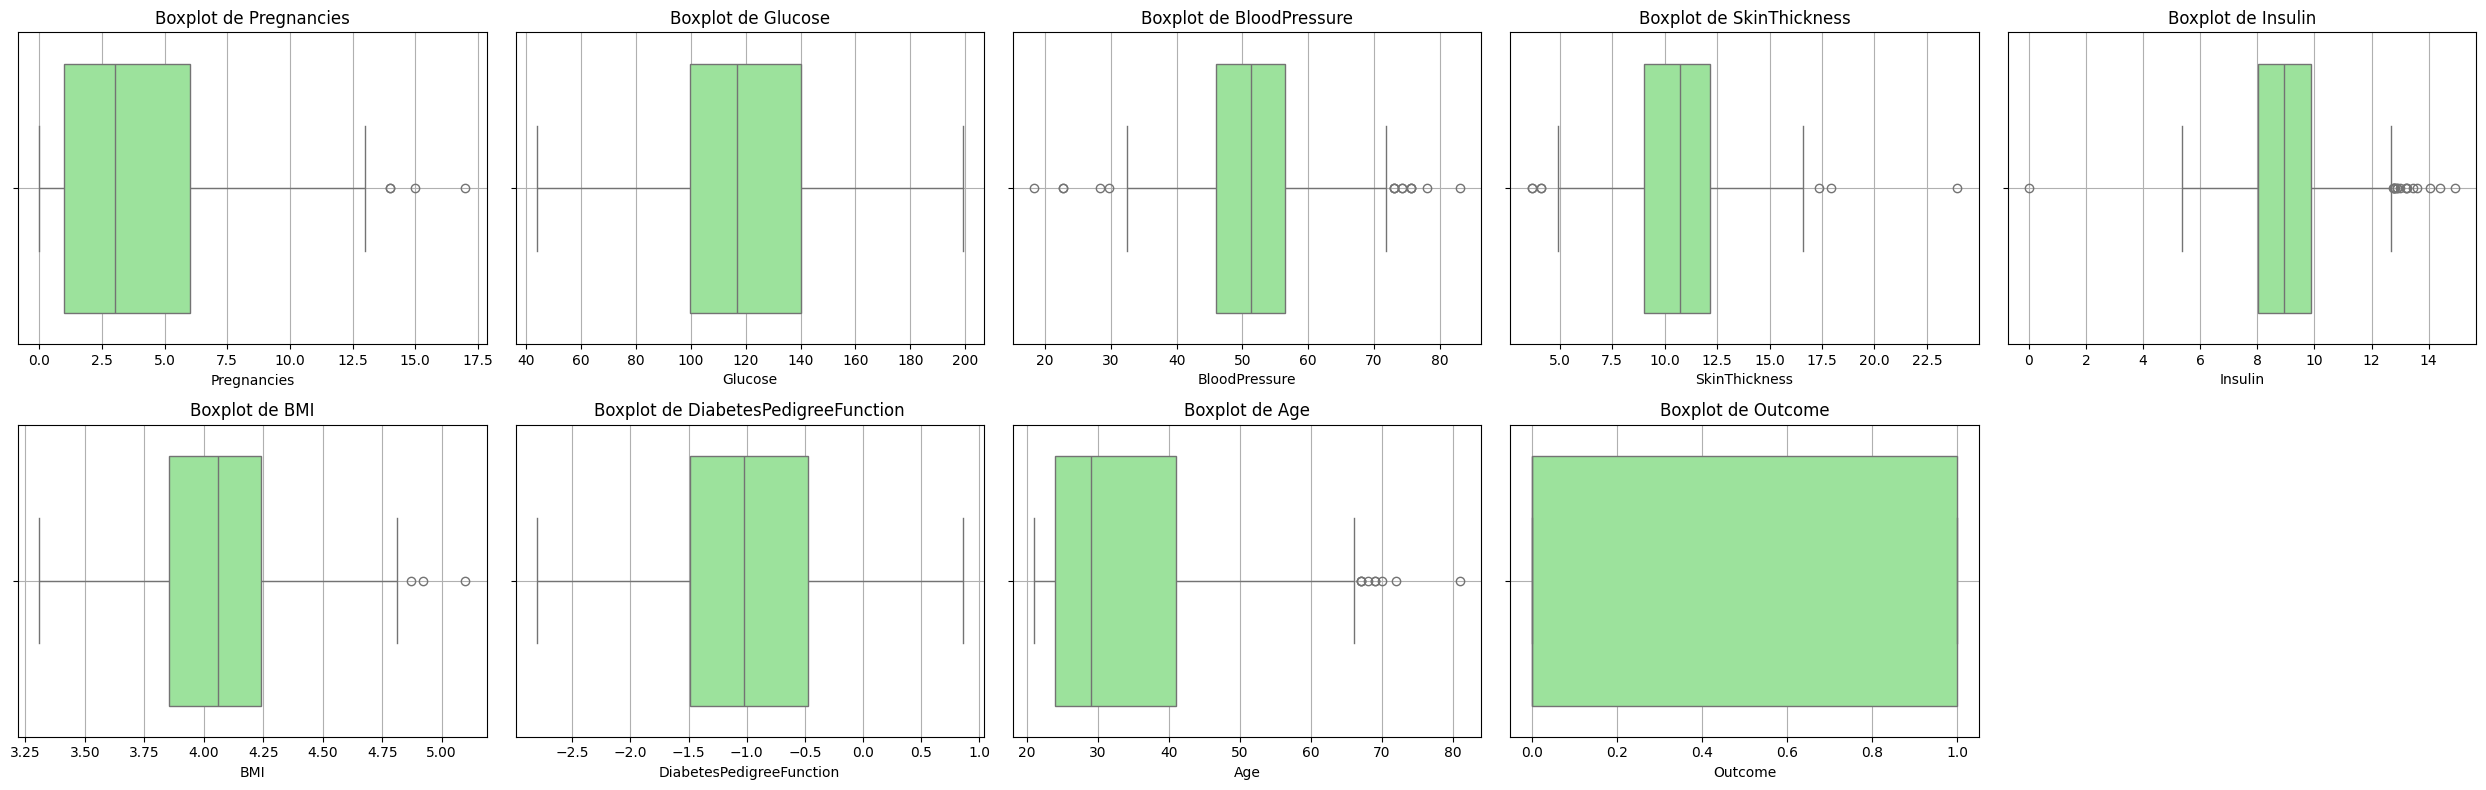

In [29]:
# Dicionário para salvar os lambdas de cada coluna
boxcox_lambdas = {}

# Lista das colunas que vamos transformar com Box-Cox
cols_boxcox = [
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction'
]

for col in cols_boxcox:
    data = df_treated[col].values

    # Box-Cox exige valores estritamente positivos
    min_val = data.min()
    if min_val <= 0:
        shift = abs(min_val) + 1
        data = data + shift
    else:
        shift = 0

    # Aplica Box-Cox
    transformed, fitted_lambda = boxcox(data)

    # Salva no dataframe transformado
    df_treated[col] = transformed

    # Guarda o lambda e o shift usado
    boxcox_lambdas[col] = {
        'lambda': fitted_lambda,
        'shift': shift
    }

boxplots(df_treated)

# 6. Processamento dos dados
Agora que conhecemos bem os dados, e tratamos o que foi possível, chegou a hora de pré-processar esse conjunto de dados para que ele fique dividido e formatado da melhor forma possível para serem utilizados nos nossos modelos de treinamento.

Vamos:
- Definir quem é entrada (X), quem é saída (Y), bem no sentido matemático mesmo `f(x) = y`, sabe?
- Escalar os dados para que eles funcionem melhor na maioria dos tipos de treinamentos;
- Dividir quantos dados vão ser usados para treinamento e quantos dados vão ser usados para teste.

In [30]:
# X representa os dados de entrada (também chamados de "features" ou "variáveis explicativas", ou "atributos" como estavamos chamando).
# No nosso caso, tudo que não é a coluna `Outcome` influencia no resultado.
X = df_treated.drop(columns=["Outcome"])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,51.228506,12.167725,10.297460,4.124519,-0.474866,50
1,1,85,47.281775,10.708073,7.390006,3.808657,-1.088080,31
2,8,183,45.958441,11.157927,10.886361,3.632453,-0.403329,32
3,1,89,47.281775,9.118643,8.165147,3.882241,-1.912132,21
4,0,137,29.708085,12.167725,9.563903,4.468470,0.803134,33


In [31]:
# Y representa a resposta esperada, ou seja, o alvo que queremos que o modelo aprenda a prever.
Y = df_treated['Outcome']
Y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


Antes de treinar qualquer um dos nosso modelos IA, é muito importante separar parte dos dados para testar se o modelo está realmente aprendendo, e não só memorizando.

- (Treino) x_train, y_train: usado para ensinar o modelo, onde `x_train` são os dados de entrada, e `y_train` os resultados sabidos.
- (Teste) x_test, y_test: usado para avaliar se o modelo aprendeu bem com dados que ele nunca viu, ou seja, ele vai colocar `x_test` no modelo, e ver quão bem ele acerta `y_test`;
- (Proporção Teste/Treino) test_size = 0.20: reserva 20% dos dados reais para teste.
- (Estratificação) stratify = y: garante que a proporção das classes em y seja mantida tanto no conjunto de treino quanto no conjunto de teste.
- (Semente de aleatoriedade) random_state: define como o conjunto de dados será embaralhado.

> Sobre semente de aleatoriedade: a proporção não vai simplesmente pegar os 80% primeiros para treino e os 20% últimos para testes. É uma boa prática embaralhar os dados até para não enviesar os resultados com a ordem da captura. Mas "como embaralhar?", isso depende da **semente de aleatoriedade**, que é definida por um número arbitrário. Se não passarmos nenhum `random_state` esse número sempre mudará, o que quer dizer que sempre que este código for rodado, um novo resultado será gerado, acabando com nossa consistência e dificultado comparar modelos, bases, etc. Por isso, definimos um número arbitrariamente que não mudará, portanto, o conjunto de dados sempre será embaralhado da mesma forma. É comum usar "42" por causa do Guia dos Mochileiros das Galáxias, mas eu escolhi uma combinação de números mais especial. :D



In [32]:
# Importamos a função que permite dividir os dados em conjuntos de treino e teste, o que é essencial para avaliar a capacidade do modelo de generalizar para novos dados.
from sklearn.model_selection import train_test_split

# Dividimos os dados em treino (80%) e teste (20%) de forma aleatória, mas reprodutível. Isso permite treinar o modelo e depois avaliá-lo com dados que ele nunca viu.
raw_x_train, raw_x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, stratify = Y, random_state=872008)

Agora que tudo está divido, está na hora de de padrozinar os dados:

In [33]:
# Importamos o StandardScaler para padronizar os dados, deixando todas as variáveis com média 0 e desvio padrão 1 — isso ajuda muitos modelos a terem um desempenho melhor.
from sklearn.preprocessing import StandardScaler

In [34]:
# Criamos o objeto StandardScaler, que será usado para padronizar os dados numéricos (média 0, desvio padrão 1).
scaler = StandardScaler()

# Aqui, o scaler aprende a média e o desvio padrão de cada coluna dos dados de entrada, preparando-se para padronizá-los.
scaler.fit(raw_x_train)

# Aplicamos a padronização nos dados, transformando as variáveis para que tenham média 0 e desvio padrão 1 — o que ajuda muitos modelos a ter um melhor desempenho.
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

Agora temos o nosso conjunto de dados (exceto o `Outcome`) transformado com o `StandardScaler`. Cada valor na tabela agora representa a distância em desvios-padrão em relação à média da respectiva coluna.

**Exemplo:** um valor 1.94 em "Glucose" significa que a pessoa tem uma glicose 1.94 desvios-padrão acima da média da população.

Vale dize que a transformação só acontece no X, de fato, pois eles que precisam estar em um "formato melhor" para os modelos de treinamento tentarem funcionar da melhor forma possível.

Para fins de comparações futuras, seria interessante termos uma combinação dos nossos dados:
- ✅ Divisão de treino/teste, usando `StandardScaler` no `df_treated`;
- ⌛ Divisão de treino/teste, usando `StandardScaler` no `df_treated_with_outliers`;
- ⌛ Divisão de treino/teste, usando o `StandardScaler` no `df`, que **não** tratamos os dados;
- ⌛ Divisão de treino/teste, **sem usar** o `StandardScaler` no `df_treated`;
- ⌛ Divisão de treino/teste, **sem usar** o `StandardScaler` no `df_treated_with_outliers`;
- ⌛ Divisão de treino/teste, **sem usar** o `StandardScaler` no `df`, que **não** tratamos os dados.

Vamos fazer todos esses teste na sessão "Apêndice: Testrando se o tratamento faz diferença".

Para evitar replicação desnecessária de código, vamos criar uma função que faz exatamente o que fizemos anteriormente:

In [35]:
def train_test_split_inner(dataframe, use_scaler):
  X = dataframe.drop(columns=["Outcome"])
  Y = dataframe["Outcome"]
  raw_x_train, raw_x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, stratify = Y, random_state=872008)
  if (use_scaler):
    scaler = StandardScaler()
    scaler.fit(raw_x_train)
    x_train = scaler.transform(raw_x_train)
    x_test = scaler.transform(raw_x_test)
    return x_train, x_test, y_train, y_test
  return raw_x_train, raw_x_test, y_train, y_test

Não precisamos usar essa função AGORA, mas é útil ter criarmos ela para no futuro fazermos as comparações das possibilidades sem tratamento e sem escalamento.

# 7. Treinamentos
Chegou a hora de treinar os modelos com a divisão que fizemos.

#### **Qual é a lógica?**

Existem **DIVERSOS** classificadores (*classifiers*), que podemos chamar de modelos. Eles são algoritmos que usam das mais diversas técnicas matemáticas e estatísticas com um único objetivo: aprender para prever.

#### **Aprendendo**

Todos eles vão usar o `x_train` para tentar aprender como ele gera o resultado descrito em `y_train`. Lembra que que `x_train` são 80% dos dados com todas as entradas, ou seja, sem `Outcome`, e `y_train` são os mesmos 80% só que só com com os resultados `Outcome`.

Isso acontece no método `.fit(x_train, y_train)`, que **TODOS** os classificadores que usaremos possuem.

Pronto, modelo treinado.

#### **Prevendo**

Agora precisamos testar se o modelo está prevendo bem e, para isso, existem várias métricas que falaremos detalhadamente mais para frente, dentre elas, acurácia, precisão, recall e F1. Leia com calma sobre essas métricas na conclusão.

Como funciona?

Vamos passar o `x_test` no modelo. Lembra que o `x_test` são aqueles 20% dos dados que escolhemos para validar nossos modelos, porém ele não contém o "gabarito", que está em `y_test`. Para "passar" o `x_test` no modelo usamos um método `.predict(x_test)`, que também **TODOS** os classificadores que usaremos possuem. Isso gera uma lista de resultados de previsão.

Por fim, precisamos apenas comparar os resultados de previsão com o "gabarito", os resultados reais. Usaremos as métricas que comentamos para entender quão bem a predição acerta baseado em critérios diferentes a depender de cada métrica.

## 7.1 Importações

Não se assuste! Aqui importamos diversos classificadores que funcionam com a lógica de `.fit` de `.predict`. Existem outras formas de treinar previsores binários, mas focaremos nesses por fins didáticos.

In [36]:
# Importa a função time do módulo time, que retorna o horário atual em segundos desde a época Unix, útil para medir a duração de processos.
from time import time
# Importa do módulo sklearn.metrics as funções accuracy_score, precision_score, recall_score e f1_score, usadas para avaliar o desempenho de modelos de Machine Learning.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Importa uma ampla variedade de algoritmos de classificação de diferentes módulos do scikit-learn, além dos classificadores XGBClassifier (XGBoost) e LGBMClassifier (LightGBM).
# Esses modelos incluem métodos lineares, de vizinhos, árvores de decisão, florestas aleatórias, boosting, redes neurais, Naive Bayes, SVM e classificadores de base (Dummy),
# permitindo testar e comparar múltiplas abordagens de Machine Learning em tarefas de classificação.
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, PassiveAggressiveClassifier, Perceptron
from sklearn.svm import SVC
from sklearn.ensemble import (
    GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier,
    AdaBoostClassifier, RandomForestClassifier, HistGradientBoostingClassifier,
    VotingClassifier, StackingClassifier
)
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

## 7.2 Classe para registro de resultados

A classe a seguir é opcional, decidi criá-la para registrar os resultados de cada um dos classificadores que utilizaremos. Vai ser bastante útil para compararmos os modelos posteriormente.

Sua estrutura é simples, ela inicializa atributos no construtor para cada informação que queremos guardar, como:

- `name`: nome do classificador;
- `classifier`: modelo, espera-se que já treinado;
- `accuracy`: acurácia alcançada;
- `precision`: precisão alcançada;
- `recall`: valor de recall alcançado;
- `f1`: valor de f1 alcançado;
- `time`: tempo que levou o treinamento mais o teste;

In [37]:
class TrainResult:
  def __init__(self, name, classifier, accuracy, precision, recall, f1, time):
    self.name = name
    self.classifier = classifier
    self.accuracy = accuracy
    self.precision = precision
    self.recall = recall
    self.f1 = f1
    self.time = time

  def __str__(self):
      return (
          f"{self.name}\n" +
          "Acurácia : {0:.2f}%\n".format(self.accuracy) +
          "Precisão : {0:.2f}%\n".format(self.precision) +
          "Recall Score: {0:.2f}%\n".format(self.recall) +
          "F1 Score : {0:.2f}%\n".format(self.f1) +
          "Tempo de treino e teste: {0:.2f}s\n".format(self.time)
      )

## 7.3 Função para treinar os modelos

Poderíamos fazer isso direto no *notebook*, porém criar uma função é útil para, mais na frente, treinarmos todos os modelos com os dataframes que não passaram por tratamento ou Scaler.

A lógica da função é:

- `models`: Nomeia e inicializa cada um dos classificadores. É importante dizer que certamente eles não estão perfeitamente configurados: todos eles possuem parâmetros e poucos foram realmente usados. Em uma situação real, deveríamos explorar essas configurações baseado na natureza dos dados, nos nossos objetivos, e no próprio estudo do fluxo de processamento.
- `results`: Array vazio para adicionarmos instâncias de `TrainResult` que criaremos para cada modelo;
- `time`: Utilizamos time para mensurar o quanto tempo demorou para treinar e testar cada modelo;

Depois disso, dentro do `for` fazemos exatamente o que tinhamos dito: treinar com o `fit`, prever com o `predict`, analisar com as métricas, e guardar tudo isso em uma instância de `TrainResult`.

In [38]:
def train_models(x_train, x_test, y_train, y_test):
  models = [
    ("Logistic Regression", LogisticRegression()),
    ("SVC", SVC()),
    ("Gradient Boosting Classifier", GradientBoostingClassifier()),
    ("Extra Trees Classifier", ExtraTreesClassifier()),
    ("Bagging Classifier", BaggingClassifier()),
    ("AdaBoost Classifier", AdaBoostClassifier()),
    ("Gaussian NB", GaussianNB()),
    ("Bernoulli NB", BernoulliNB()),
    ("MLP Classifier", MLPClassifier()),
    ("XGB Classifier", XGBClassifier()),
    ("LGBM Classifier", LGBMClassifier(verbose=-1)),
    ("K Nearest Neighbour Classifier", KNeighborsClassifier()),
    ("Decision Tree Classifier", DecisionTreeClassifier()),
    ("Random Forest Classifier", RandomForestClassifier()),
    ("LDA", LinearDiscriminantAnalysis()),
    ("QDA", QuadraticDiscriminantAnalysis()),
    ("SGD-Log", SGDClassifier(loss="log_loss", alpha=1e-3, class_weight="balanced", max_iter=2000)),
    ("RidgeClf", RidgeClassifier()),
    ("HGB", HistGradientBoostingClassifier()),
    ("Calibrated SVC", CalibratedClassifierCV(cv=5)),
    ("Passive Aggressive", PassiveAggressiveClassifier()),
    ("Perceptron", Perceptron()),
    ("Dummy Classifier", DummyClassifier(strategy="most_frequent")),
    # Ensemble avançados (Voting e Stacking precisam receber estimadores)
    ("Voting Classifier (Hard)", VotingClassifier(estimators=[
        ('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('svc', SVC())
    ], voting='hard')),
    ("Voting Classifier (Soft)", VotingClassifier(estimators=[
        ('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('svc', SVC(probability=True))
    ], voting='soft')),
    ("Stacking Classifier", StackingClassifier(
        estimators=[('rf', RandomForestClassifier()), ('gb', GradientBoostingClassifier())],
        final_estimator=LogisticRegression()
    ))
  ]

  results = []

  for name, classifier in models:
    t0 = time()

    classifier.fit(x_train, y_train)
    pred_y = classifier.predict(x_test)

    train_test_time = time() - t0

    acc = accuracy_score(y_test, pred_y) * 100
    pre = precision_score(y_test, pred_y) * 100
    rec = recall_score(y_test, pred_y) * 100
    f1 = f1_score(y_test, pred_y) * 100

    results.append(TrainResult(name, classifier, acc, pre, rec, f1, train_test_time))

  return results

Depois de definida a função, usamos ela e guardamos o resultado.

In [39]:
results = train_models(x_train, x_test, y_train, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [40]:
# Vamos só printar uma delas para ver o resultado:
print(results[0])

Logistic Regression
Acurácia : 76.62%
Precisão : 70.45%
Recall Score: 57.41%
F1 Score : 63.27%
Tempo de treino e teste: 0.01s



# 8. Comparações e escolha do modelo
Agora, precisamos de uma forma de comparar os modelos visualmente. Para isso vamos criar uma função que plota dois gráficos:

- Uma tabela (heatmap) para comparar as métricas obtidas de cada modelo;
- E um gráfico de pirulito para compararmos o tempo

Mais uma vez, o objetivo de criar uma função é que mais para frente poderemos reutilizar para comparar com os conjuntos de dados que não foram tratados.

In [41]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# --- sua função, agora parametrizada por 'sort_by'
def plot_results_summary(results, sort_by='Recall'):
    # -> DataFrame
    df = pd.DataFrame({
        'Modelo':   [r.name for r in results],
        'Acurácia': [r.accuracy for r in results],
        'Precisão': [r.precision for r in results],
        'Recall':   [r.recall for r in results],
        'F1-score': [r.f1 for r in results],
        'Tempo (s)': [r.time for r in results],
    })

    # métrica escolhida: desc p/ métricas de qualidade, asc p/ tempo
    descending = sort_by != 'Tempo (s)'
    df = df.sort_values(sort_by, ascending=not descending).reset_index(drop=True)

    # Figura com 2 painéis: (heatmap | lollipop do tempo)
    sns.set_theme(style="whitegrid")
    fig = plt.figure(figsize=(30, 9))
    gs = fig.add_gridspec(nrows=1, ncols=2, width_ratios=[3.0, 1.6], wspace=0.25)

    # --- Painel 1: Heatmap de métricas (0-100%)
    ax0 = fig.add_subplot(gs[0, 0])
    metrics = df.set_index('Modelo')[['Acurácia', 'Precisão', 'Recall', 'F1-score']]
    hm = sns.heatmap(
        metrics,
        annot=True, fmt=".1f", cmap="YlGnBu",
        vmin=0, vmax=100, linewidths=0.5, linecolor='white',
        cbar=False, ax=ax0
    )
    ax0.set_title(f"Acurácia, Precisão, Recall e F1 (%) — ordenado por {sort_by}")
    ax0.set_xlabel(""); ax0.set_ylabel("")

    # --- Painel 2: Lollipop de tempo
    ax1 = fig.add_subplot(gs[0, 1])
    y = np.arange(len(df))
    x = df['Tempo (s)'].values
    ax1.hlines(y=y, xmin=0, xmax=x, color='lightgray', lw=2, zorder=1)
    ax1.plot(x, y, 'o', ms=8, zorder=2)
    ax1.set_yticks(y); ax1.set_yticklabels(df['Modelo'])
    ax1.invert_yaxis()  # topo = melhor conforme ordenação aplicada

    if (x.max() / max(x.min(), 1e-9)) > 15:
        ax1.set_xscale('log'); ax1.set_xlabel("Tempo (s) — escala log")
    else:
        ax1.set_xlabel("Tempo (s)")
    ax1.set_title("Velocidade de treino+teste")

    for xi, yi in zip(x, y):
        ax1.annotate(f"{xi:.2f}s", (xi, yi),
                     xytext=(6, 0), textcoords="offset points",
                     va='center', fontsize=9)

    fig.suptitle("Comparativo único de qualidade (heatmap) e velocidade (lollipop)", y=0.98, fontsize=14)
    plt.tight_layout()
    plt.show()

# --- widget de ordenação
dd = widgets.Dropdown(
    options=['Recall', 'F1-score', 'Precisão', 'Acurácia', 'Tempo (s)'],
    value='Recall',
    description='Ordenar por:',
)

out = widgets.Output()

def _redraw(change=None):
    with out:
        clear_output(wait=True)
        plot_results_summary(results, sort_by=dd.value)

dd.observe(_redraw, names='value')

display(dd)
_redraw()
display(out)

Dropdown(description='Ordenar por:', options=('Recall', 'F1-score', 'Precisão', 'Acurácia', 'Tempo (s)'), valu…

Output()

# 9. Conclusões

## 9.1 Qual modelo escolher?

### 9.1.1 Tempo de treino e testes
Vamos começar falando sobre o tempo. É importante lembrar que nossa base de dados possui `.shape` (768, 9), ou seja, 768 linha e 9 colunas. Com essa forma, todo o tempo de processamento é praticamente instantâneo, variando entre 0 e 3 segundos.

Então essa métrica pode ser descartada para tomada de decisão.

### 9.1.2 Baseline (Dummy Classifier)
Antes de mais nada vamos falar da importância do "Dummy Classifier". Ele é nosso "piso", no sentido de que "o modelo que vamos escolher, ele precisa ser pelo menos melhor que isso".

Anteriormente tínhamos configurado ele como "Most Frequencie", então, basicamente ele vai observar nosso `y_train` e notar se aparece mais 0 ou 1. Anotado isso, digamos que seja 0, para TODAS as entradas em `x_test` ele irá dizer que é 0.

Parece besta né? Mas fazendo isso ele ainda conseguiu uma acurácia de 64.9%, mais da metade de acertos. É a famosa história de "até um relógio quebrado está certo duas vezes por dia".

Precisamos fazer melhor do que isso!

Mas quão melhor? "Um modelo que prevê com 100% de acerto é o melhor modelo possível né?" Na verdade, não. Esse seria um problema de **overfitting**, ou seja, nosso modelo ficou MUITO BOM em prever apenas a nossa base de dados, mas ao tentar generalizar para situações fora dela, ele vai se perder!

Então sabemos que, queremos algo MAIOR QUE 64.9% e MENOR QUE 100%.

### 9.1.3 Qual a métrica deveríamos priorizar?
- **Acurácia (Accuracy)**: proporção de acertos sobre todas as previsões;
  - **Ponto forte:** fácil de entender.
  - **Ponto fraco:** pode enganar em bases desbalanceadas, no Pima Indians, se 65% dos pacientes não têm diabetes, um modelo que prevê “não” para todo mundo teria 65% de acurácia, mas não serve para diagnóstico.
- **Precisão (Precision)**: De todas as previsões de positivo, quantas realmente eram positivas.
  - **Ponto forte:** alta precisão, ou seja, poucos falsos positivo. No contexto médico, isso significa evitar diagnosticar diabetes em quem não tem.
  - **Ponto fraco:** um modelo pode ter alta precisão e mesmo assim deixar passar vários casos positivos (baixo recall)
- **Recall (Sensibilidade ou Sensibilidade Verdadeira):** de todos os casos realmente positivos, quantos o modelo detectou.
  - Alta sensibilidade, ou seja, poucos falsos negativos.
  - No contexto médico, significa detectar a maioria das pessoas com diabetes. Baixo recall pode ser perigoso, porque significa que o modelo está deixando muitos pacientes doentes sem diagnóstico.
- **F1-Score:** A média harmônica entre Precisão e Recall.
  - É útil quando você quer um equilíbrio entre não dar falso positivo demais e não deixar passar casos positivos. É especialmente relevante em datasets desbalanceados.

**Arrisco a dizer que Recall é a nossa métrica mais importante.** Em diagnóstico médico, o pior erro possível é um **falso negativo**, ou seja, quando um paciente doente que recebe diagnóstico de “saudável”.

Isso porque pode gerar um atraso no tratamento, reduzindo as chances de cura ou controle da doença. Aumenta o risco de agravamento, já que o paciente continua sem acompanhamento. E ainda possui impactos éticos e legais, onde médicos e hospitais podem ser responsabilizados por negligência diagnóstica.

Já o falso positivo (quando o modelo diz que há doença, mas não há) também é indesejado, mas as consequências são geralmente menos graves: causa ansiedade, custo de exames adicionais e tempo gasto, mas não coloca a vida em risco imediato.

Por isso, maximizar o Recall garante que quase todos os pacientes com a doença sejam identificados, mesmo que isso signifique aumentar um pouco o número de falsos positivos. Em termos práticos, no hospital é preferível chamar para novos exames alguns pacientes que não têm a doença do que deixar um único paciente grave ir para casa sem diagnóstico.

O **F1-score** vem logo atrás, porque mantém um equilíbrio e evita que o recall alto venha à custa de uma precisão baixíssima.

A **acurácia**, embora importante como visão geral, não deve ser o único critério.

A **precisão** pode ser monitorada para evitar excesso de alarmes falsos, mas no diagnóstico inicial o foco deve ser não deixar passar nenhum caso suspeito.

### 9.1.4 Decisão final
Se precisássemos definir um modelo, dado o fluxo de processamento, eu recomendaria o `SGD-Log`, ele foi o que teve o Recall mais alto, sem um custo tão agressivo nas outras métricas.

## 9.2 Comparando o modelo escolhido com os resultados sabidos

### 9.2.1 Matriz de confusão
No Pima Indians Diabetes, como o alvo é binário, uma das formas visuais mais didáticas de fazer a comparação é a matriz de confusão, que mostra visualmente onde o modelo acertou e errou.

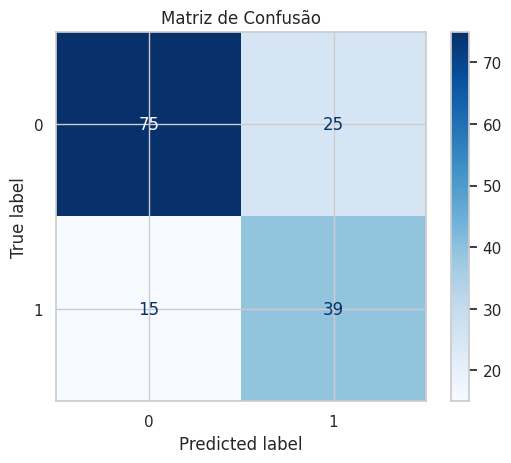

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

x_train, x_test, y_train, y_test = train_test_split_inner(df_treated, True)

sgd_log_result = next((e for e in results if e.name == "SGD-Log"), None)

modelo = sgd_log_result.classifier

# Previsões do modelo
y_pred =modelo.predict(x_test)

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibir
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()

- **75 Verdadeiros Negativos (TN)**: o modelo previu não diabetes (0) corretamente.
- **25 Falsos Positivos (FP)**: o modelo disse que tinha diabetes (1), mas na verdade não tinha. Idealmente deveríamos lutar para diminuir esse valor.
- **15 Falsos Negativos (FN)**: o modelo disse que não tinha diabetes (0), mas na verdade tinha.
- **39 Verdadeiros Positivos (VP)**: o modelo previu 1 corretamente.

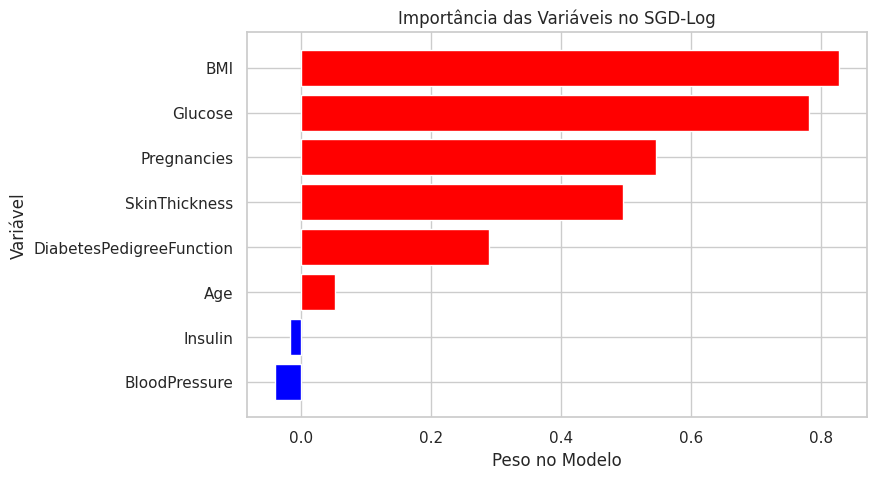

In [53]:
# Coeficientes do modelo (para binário, modelo.coef_[0])
coef = modelo.coef_[0]

# Monta DataFrame com features e coeficientes
coef_df = pd.DataFrame({
    'Feature': df_treated.drop(columns=["Outcome"]).columns,
    'Coeficiente': coef
}).sort_values(by='Coeficiente', ascending=False)

# Plota
plt.figure(figsize=(8,5))
colors = np.where(coef_df['Coeficiente'] > 0, 'red', 'blue')
plt.barh(coef_df['Feature'], coef_df['Coeficiente'], color=colors)
plt.xlabel('Peso no Modelo')
plt.ylabel('Variável')
plt.title('Importância das Variáveis no SGD-Log')
plt.gca().invert_yaxis()
plt.show()

## 9.3 [TODO] Melhorando as configurações do modelo escolhido

# Apêndice 01: testando se o tratamento faz diferença

Nos resultados a seguir notaremos a importância de tratar e escalonar nossos dados.

Note que quanto menos tratado, mais inconsistênte os resultados são, alcançando números absurdos tanto para mais, quanto para menos. E mesmo conforme os dados vão ficando mais consistêntes, nenhum chega no nível de homogeniedade obtido no resultado principal.

Note também diversos avisos (*warnings*) que são lançados pelos próprios classificadores avisando que os dados não estão do jeito que eles esperam.

## A01. Sem nenhum tratamento, sem o `StandardScaler`.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split_inner(df, False)
results = train_models(x_train, x_test, y_train, y_test)
plot_results_summary(results)

## A02. Sem nenhum tratamento, com o `StandardScaler`.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split_inner(df, True)
results = train_models(x_train, x_test, y_train, y_test)
plot_results_summary(results)

## A03. Apenas com os zeros tratados, sem tratar *outliers*, sem `StandardScaler`

In [ ]:
x_train, x_test, y_train, y_test = train_test_split_inner(df_treated_with_outliers, False)
results = train_models(x_train, x_test, y_train, y_test)
plot_results_summary(results)

## A04. Apenas com os zeros tratados, sem tratar *outliers*, com `StandardScaler`

In [ ]:
x_train, x_test, y_train, y_test = train_test_split_inner(df_treated_with_outliers, True)
results = train_models(x_train, x_test, y_train, y_test)
plot_results_summary(results)

## A05. Conjunto de dados tratados, porém sem `StandardScaler`

In [ ]:
x_train, x_test, y_train, y_test = train_test_split_inner(df_treated, False)
results = train_models(x_train, x_test, y_train, y_test)
plot_results_summary(results)

# Referências
1. EDUARDO. Machine Learning - Métodos de Classificação Supervisionados. Disponível em: <http://www.leg.ufpr.br/~eferreira/CE064/work5.html#fn1>. Acesso em: 7 ago. 2025.
2. https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/discussion/114293
3. HAYASHI, Y.; YUKITA, S. Rule extraction using Recursive-Rule extraction algorithm with J48graft combined with sampling selection techniques for the diagnosis of type 2 diabetes mellitus in the Pima Indian dataset. Informatics in Medicine Unlocked, v. 2, p. 92–104, 2016.
4. FROST, J. Linear Regression Explained with Examples. Disponível em: <https://statisticsbyjim.com/regression/linear-regression>. Acesso em: 7 ago. 2025.
5. Dua, D. & Graff, C. (2019). UCI Machine Learning Repository: Pima Indians Diabetes Database. University of California, Irvine. Disponível em: https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes